# Final Project - Diabetes Dataset 2019 | 404BrainNotFound

### Diabetes Prediction using Machine Learning Model

#### Anggota Kelompok:
1) Kezia Natalia (211402002)
2) Ade Bunga Dwi Setiayu (211402008)
3) Albert Nathaniel (211402089)
4) Nadya Ruth Enina Purba (211402154)

#### Dataset: Diabetes Dataset 2019 (https://drive.google.com/file/d/14ySas0DRD6eJ7ysw22JSN2G_OZ5tLHlR/view?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV

<a id="preprocessing"></a>
<h2><b><span style="color:#005f26">🔶 Step 1 | </span><span style="color:#ff6200">Data Preprocessing</span></b></h2>

<a id="formatting"></a>
<h2><b><span style="color:#005f26">1.1 | </span><span style="color:#ff6200">Data Formatting</span></b></h2>

<a id="import"></a>
<h3><b><span style="color:#005f26">1.1.1 | </span><span style="color:#ff6200">Importing Data</span></b></h3>

In [2]:
df_diabetes = pd.read_csv('diabetes_dataset_2019.csv')

In [3]:
df_diabetes

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


<a id="dtype"></a>
<h3><b><span style="color:#005f26">1.1.2 | </span><span style="color:#ff6200">Check Column and Data Type</span></b></h3>

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [5]:
df_diabetes = df_diabetes.rename(columns={'Pregancies': 'Pregnancies'})
df_diabetes = df_diabetes.rename(columns={'UriationFreq': 'UrinationFreq'})

In [6]:
df_diabetes.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [7]:
df_diabetes['Pregnancies'].value_counts()

Pregnancies
0.0    754
2.0     64
3.0     60
1.0     28
4.0      4
Name: count, dtype: int64

In [8]:
print(df_diabetes[df_diabetes['Gender']=='Male']['Pregnancies'].value_counts())
print(df_diabetes[df_diabetes['Gender']=='Male']['Pdiabetes'].value_counts())

Pregnancies
0.0    552
1.0      8
2.0      4
Name: count, dtype: int64
Pdiabetes
0      578
yes      1
Name: count, dtype: int64


In [9]:
df_diabetes[(df_diabetes['Gender'] == 'Male') & (df_diabetes['Pdiabetes'] == 'yes')]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
115,less than 40,Male,no,no,one hr or more,22.0,yes,no,9,2,no,always,always,high,0.0,yes,quite often,no


In [10]:
df_diabetes.drop(df_diabetes[(df_diabetes['Gender'] == 'Male') & (df_diabetes['Pdiabetes'] == 'yes')].index,inplace=True)

In [11]:
df_diabetes[(df_diabetes['Gender'] == 'Male') & (df_diabetes['Pregnancies'] != 0)].head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
51,40-49,Male,no,no,more than half an hr,23.0,no,no,7,4,no,often,sometimes,normal,2.0,0,not much,no
52,60 or older,Male,no,yes,less than half an hr,19.0,no,yes,6,6,yes,often,sometimes,high,1.0,0,not much,no
54,less than 40,Male,no,no,more than half an hr,30.0,yes,yes,5,5,yes,often,not at all,normal,1.0,0,not much,no
136,less than 40,Male,yes,no,more than half an hr,21.0,yes,no,8,8,no,occasionally,very often,normal,NaN,0,not much,no
141,less than 40,Male,no,no,more than half an hr,24.0,yes,yes,7,6,no,often,sometimes,normal,NaN,0,not much,no


In [12]:
print(df_diabetes[df_diabetes['Gender']=='Male']['Pregnancies'].value_counts())
print(df_diabetes[df_diabetes['Gender']=='Male']['Pdiabetes'].value_counts())

Pregnancies
0.0    551
1.0      8
2.0      4
Name: count, dtype: int64
Pdiabetes
0    578
Name: count, dtype: int64


<a id="duplicate"></a>
<h3><b><span style="color:#005f26">1.1.3 | </span><span style="color:#ff6200">Check Duplicate Data</span></b></h3>

In [13]:
duplicate_rows = df_diabetes.duplicated().sum()
print ("Number of Duplicate Rows:", duplicate_rows)

Number of Duplicate Rows: 622


In [14]:
df_duplicate = df_diabetes[df_diabetes.duplicated()]
df_duplicate

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
238,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
240,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
241,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
244,less than 40,Male,no,no,one hr or more,24.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
245,less than 40,Male,no,no,less than half an hr,20.0,no,no,7,7,yes,occasionally,sometimes,low,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,less than 40,Male,no,no,less than half an hr,30.0,no,yes,8,8,yes,occasionally,sometimes,normal,0.0,0,not much,yes
946,40-49,Male,yes,yes,one hr or more,22.0,no,no,7,6,yes,occasionally,sometimes,high,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no


In [15]:
df_diabetes[(df_diabetes['Gender'] == 'Male') & (df_diabetes['BMI'] == 39.0) & (df_diabetes['SoundSleep'] == 6)]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
238,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
476,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
714,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no


In [16]:
df_diabetes[(df_diabetes['Age'] == '40-49') & (df_diabetes['Gender'] == 'Male') & (df_diabetes['BMI'] == 24.0) & (df_diabetes['SoundSleep'] == 6)]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
240,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
478,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
716,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no


In [17]:
selected_rows = df_diabetes.iloc[[1, 239, 241]]
print(selected_rows)

       Age Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
1    50-59   Male              no    yes  less than half an hr  28.0      no   
240  40-49   Male              no     no        one hr or more  24.0      no   
242  40-49   Male             yes     no  less than half an hr  27.0      no   

    Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress  \
1        no      8           6             yes    very often  sometimes   
240      no      6           6              no  occasionally  sometimes   
242      no      8           8              no  occasionally  sometimes   

    BPLevel  Pregnancies Pdiabetes UrinationFreq Diabetic  
1    normal          0.0         0      not much       no  
240  normal          0.0         0      not much       no  
242  normal          0.0         0      not much      yes  


In [18]:
df_diabetes = df_diabetes.drop_duplicates()
df_diabetes

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,50-59,Female,no,yes,more than half an hr,45.0,no,no,7,3,yes,occasionally,always,high,0.0,0,not much,yes
893,40-49,Male,yes,no,none,25.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,yes
922,less than 40,Male,no,yes,less than half an hr,29.0,no,no,6,4,no,very often,sometimes,normal,0.0,0,quite often,no
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes


<a id="difformat"></a>
<h3><b><span style="color:#005f26">1.1.4 | </span><span style="color:#ff6200">Check Different Format</span></b></h3>

In [19]:
for column in df_diabetes.columns:
    unique_value = len(df_diabetes[column].unique())
    print(f"{column} : {unique_value} Unique Value")

Age : 4 Unique Value
Gender : 2 Unique Value
Family_Diabetes : 2 Unique Value
highBP : 2 Unique Value
PhysicallyActive : 4 Unique Value
BMI : 27 Unique Value
Smoking : 2 Unique Value
Alcohol : 2 Unique Value
Sleep : 8 Unique Value
SoundSleep : 12 Unique Value
RegularMedicine : 3 Unique Value
JunkFood : 4 Unique Value
Stress : 4 Unique Value
BPLevel : 6 Unique Value
Pregnancies : 6 Unique Value
Pdiabetes : 4 Unique Value
UrinationFreq : 2 Unique Value
Diabetic : 4 Unique Value


In [20]:
print(df_diabetes['Age'].value_counts())

Age
less than 40    161
50-59            59
40-49            59
60 or older      50
Name: count, dtype: int64


In [21]:
print(df_diabetes['Gender'].value_counts())

Gender
Male      196
Female    133
Name: count, dtype: int64


In [22]:
print(df_diabetes['Family_Diabetes'].value_counts())

Family_Diabetes
no     175
yes    154
Name: count, dtype: int64


In [23]:
print(df_diabetes['highBP'].value_counts())

highBP
no     246
yes     83
Name: count, dtype: int64


In [24]:
print(df_diabetes['PhysicallyActive'].value_counts())

PhysicallyActive
less than half an hr    117
more than half an hr    104
one hr or more           66
none                     42
Name: count, dtype: int64


In [25]:
print(df_diabetes['Smoking'].value_counts())

Smoking
no     298
yes     31
Name: count, dtype: int64


In [26]:
print(df_diabetes['Alcohol'].value_counts())

Alcohol
no     266
yes     63
Name: count, dtype: int64


In [27]:
print('Before :', df_diabetes['RegularMedicine'].value_counts())
df_diabetes['RegularMedicine'] = df_diabetes['RegularMedicine'].replace({'o': 'no'})
print('After :', df_diabetes['RegularMedicine'].value_counts())

Before : RegularMedicine
no     213
yes    115
o        1
Name: count, dtype: int64
After : RegularMedicine
no     214
yes    115
Name: count, dtype: int64


In [28]:
print(df_diabetes['JunkFood'].value_counts())

JunkFood
occasionally    241
often            59
very often       18
always           11
Name: count, dtype: int64


In [29]:
print(df_diabetes['Stress'].value_counts())

Stress
sometimes     205
very often     52
not at all     46
always         26
Name: count, dtype: int64


In [30]:
print('Before :', df_diabetes['BPLevel'].value_counts())
df_diabetes['BPLevel'] = df_diabetes['BPLevel'].replace({'High': 'high', 'Low': 'low', 'normal ': 'normal'})
print('After :', df_diabetes['BPLevel'].value_counts())

Before : BPLevel
normal     241
high        71
low          8
High         5
Low          3
normal       1
Name: count, dtype: int64
After : BPLevel
normal    242
high       76
low        11
Name: count, dtype: int64


In [31]:
print('Before :', df_diabetes['Pdiabetes'].value_counts())
df_diabetes['Pdiabetes'] = df_diabetes['Pdiabetes'].replace({'0': 'no'})
print('After :', df_diabetes['Pdiabetes'].value_counts())

Before : Pdiabetes
0      322
yes      5
no       1
Name: count, dtype: int64
After : Pdiabetes
no     323
yes      5
Name: count, dtype: int64


In [32]:
print(df_diabetes['UrinationFreq'].value_counts())

UrinationFreq
not much       224
quite often    105
Name: count, dtype: int64


In [33]:
print('Before :', df_diabetes['Diabetic'].value_counts())
df_diabetes['Diabetic'] = df_diabetes['Diabetic'].replace({' no': 'no'})
print('After :', df_diabetes['Diabetic'].value_counts())

Before : Diabetic
no     233
yes     94
 no      1
Name: count, dtype: int64
After : Diabetic
no     234
yes     94
Name: count, dtype: int64


<a id="missing"></a>
<h2><b><span style="color:#005f26">1.2 | </span><span style="color:#ff6200">Handling Missing Value</span></b></h2>

In [34]:
missing_values = df_diabetes.isnull().sum()
missing_values

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregnancies         42
Pdiabetes            1
UrinationFreq        0
Diabetic             1
dtype: int64

In [35]:
(missing_values/len(df_diabetes))*100

Age                  0.000000
Gender               0.000000
Family_Diabetes      0.000000
highBP               0.000000
PhysicallyActive     0.000000
BMI                  1.215805
Smoking              0.000000
Alcohol              0.000000
Sleep                0.000000
SoundSleep           0.000000
RegularMedicine      0.000000
JunkFood             0.000000
Stress               0.000000
BPLevel              0.000000
Pregnancies         12.765957
Pdiabetes            0.303951
UrinationFreq        0.000000
Diabetic             0.303951
dtype: float64

In [36]:
total_cells = np.product(df_diabetes.shape)
total_missing = missing_values.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.8105369807497468


In [37]:
df_diabetes['Pregnancies'].value_counts()

Pregnancies
0.0    240
2.0     19
3.0     19
1.0      8
4.0      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Pregnancies vs Age Before Handling Missing Values')

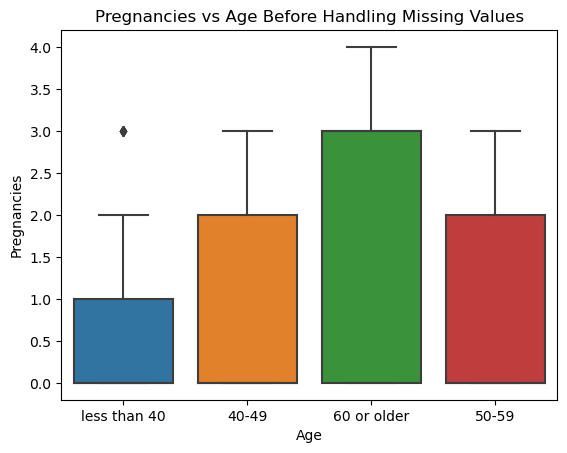

In [38]:
sns.boxplot(data = df_diabetes[df_diabetes['Gender'] == 'Female'], x='Age', y='Pregnancies')
plt.title('Pregnancies vs Age Before Handling Missing Values')

In [39]:
df_female = df_diabetes[df_diabetes['Gender'] == 'Female']
df_female_lessthan40 = df_female[df_female['Age'] == 'less than 40']
df_female_40 = df_female[df_female['Age'] == '40-49']
df_female_50 = df_female[df_female['Age'] == '50-59']
df_female_60older = df_female[df_female['Age'] == '60 or older']

mean_lessthan40 = np.mean(df_female_lessthan40['Pregnancies'])
mean_40 = np.mean(df_female_40['Pregnancies'])
mean_50 = np.mean(df_female_50['Pregnancies'])
mean_60older = np.mean(df_female_60older['Pregnancies'])

print(f'Mean of pregnancies for ages less than 40: ', mean_lessthan40)
print(f'Mean of pregnacnices for ages 40-49: ', mean_40)
print(f'Mean of pregnancies for ages 50-59: ', mean_50)
print(f'Mean of pregnancies for ages 60 or older: ', mean_60older)

Mean of pregnancies for ages less than 40:  0.5918367346938775
Mean of pregnacnices for ages 40-49:  1.0476190476190477
Mean of pregnancies for ages 50-59:  0.85
Mean of pregnancies for ages 60 or older:  2.0


In [40]:
preg_lessthan40 = round(mean_lessthan40)
preg_40 = round(mean_40)
preg_50 = round(mean_50)
preg_60older = round(mean_60older)

def impute_pregnancies(df_pregnancies):
    Age = df_pregnancies[0]
    Gender = df_pregnancies[1]
    Pregnancies = df_pregnancies[2]
    
    if pd.isnull(Pregnancies):
        if Gender == 'Male':
            return 0.0
        elif Age == 'less than 40':
            return preg_lessthan40
        elif Age == '40-49':
            return preg_40
        elif Age == '50-59':
            return preg_50
        elif Age == '60 or older':
            return preg_60older
    else:
        return Pregnancies

In [41]:
df_diabetes['Pregnancies'] = df_diabetes[['Age','Gender','Pregnancies']].apply(impute_pregnancies,axis=1)
df_diabetes['Pregnancies'].value_counts()

Pregnancies
0.0    256
1.0     33
2.0     20
3.0     19
4.0      1
Name: count, dtype: int64

In [42]:
df_diabetes.loc[(df_diabetes['Gender'] == 'Male') & (df_diabetes['Pregnancies'] != 0), 'Pregnancies'] = 0

In [43]:
df_diabetes['Pregnancies'] = df_diabetes['Pregnancies'].astype('int64')
df_diabetes['Pregnancies'].value_counts()

Pregnancies
0    260
1     30
2     19
3     19
4      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Pregnancies vs Age After Handling Missing Values')

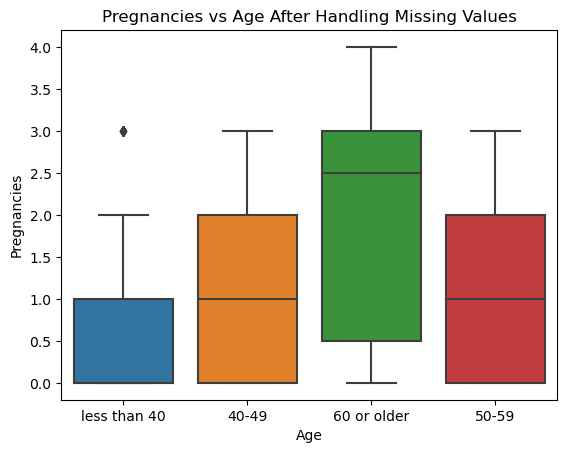

In [44]:
sns.boxplot(data = df_diabetes[df_diabetes['Gender'] == 'Female'], x='Age', y='Pregnancies')
plt.title('Pregnancies vs Age After Handling Missing Values')

In [45]:
df_diabetes.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 4
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregnancies         0
Pdiabetes           1
UrinationFreq       0
Diabetic            1
dtype: int64

Text(0.5, 1.0, 'BMI Distribution Before Handling Missing Values')

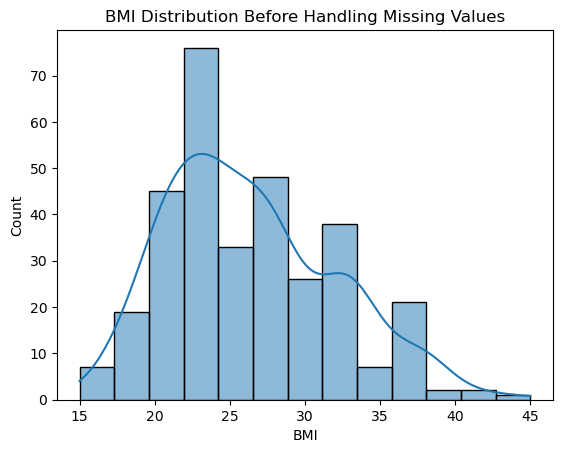

In [46]:
sns.histplot(data = df_diabetes, x = 'BMI', kde='True')
plt.title('BMI Distribution Before Handling Missing Values')

In [47]:
df_diabetes['BMI'] = df_diabetes['BMI'].fillna(df_diabetes['BMI'].median())
print(f'Median of BMI: ', df_diabetes['BMI'].median())

Median of BMI:  26.0


Text(0.5, 1.0, 'BMI Distribution After Handling Missing Values')

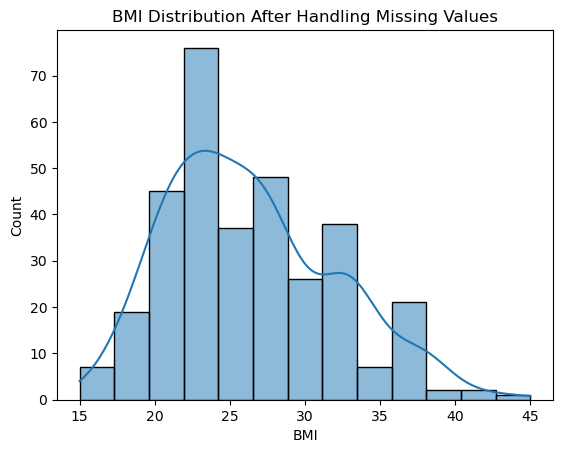

In [48]:
sns.histplot(data = df_diabetes, x = 'BMI', kde='True')
plt.title('BMI Distribution After Handling Missing Values')

In [49]:
df_diabetes.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregnancies         0
Pdiabetes           1
UrinationFreq       0
Diabetic            1
dtype: int64

In [50]:
df_diabetes = df_diabetes.dropna(axis = 0).reset_index(drop = True)
df_diabetes.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregnancies         0
Pdiabetes           0
UrinationFreq       0
Diabetic            0
dtype: int64

In [51]:
df_diabetes.duplicated().sum()

27

In [52]:
df_duplicate = df_diabetes[df_diabetes.duplicated()]
df_duplicate.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
239,less than 40,Male,no,no,more than half an hr,20.0,no,no,8,8,no,occasionally,sometimes,normal,0,no,not much,no
241,less than 40,Female,no,no,more than half an hr,24.0,no,no,6,6,no,occasionally,sometimes,normal,2,no,quite often,no
259,less than 40,Male,no,yes,more than half an hr,26.0,no,no,6,6,no,occasionally,sometimes,normal,0,no,quite often,no
261,less than 40,Male,no,no,more than half an hr,22.0,no,no,6,6,no,occasionally,sometimes,low,0,no,not much,no
262,less than 40,Male,yes,no,more than half an hr,21.0,yes,no,8,8,no,occasionally,very often,normal,0,no,not much,no


In [53]:
df_diabetes[(df_diabetes['Age'] == 'less than 40') & (df_diabetes['Gender'] == 'Male') & (df_diabetes['BMI'] == 20.0) & (df_diabetes['SoundSleep'] == 8)]

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
9,less than 40,Male,no,no,more than half an hr,20.0,no,no,8,8,no,occasionally,sometimes,normal,0,no,not much,no
239,less than 40,Male,no,no,more than half an hr,20.0,no,no,8,8,no,occasionally,sometimes,normal,0,no,not much,no


In [54]:
df_diabetes = df_diabetes.drop_duplicates()
df_diabetes

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,Pdiabetes,UrinationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0,no,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0,no,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0,no,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0,no,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0,no,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,50-59,Female,no,yes,more than half an hr,45.0,no,no,7,3,yes,occasionally,always,high,0,no,not much,yes
323,40-49,Male,yes,no,none,25.0,no,no,8,8,no,occasionally,sometimes,normal,0,no,not much,yes
324,less than 40,Male,no,yes,less than half an hr,29.0,no,no,6,4,no,very often,sometimes,normal,0,no,quite often,no
325,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0,no,not much,yes


<a id="summary"></a>
<h2><b><span style="color:#005f26">1.3 | </span><span style="color:#ff6200">Summary Statistic</span></b></h2>

In [55]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 326
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               300 non-null    object 
 1   Gender            300 non-null    object 
 2   Family_Diabetes   300 non-null    object 
 3   highBP            300 non-null    object 
 4   PhysicallyActive  300 non-null    object 
 5   BMI               300 non-null    float64
 6   Smoking           300 non-null    object 
 7   Alcohol           300 non-null    object 
 8   Sleep             300 non-null    int64  
 9   SoundSleep        300 non-null    int64  
 10  RegularMedicine   300 non-null    object 
 11  JunkFood          300 non-null    object 
 12  Stress            300 non-null    object 
 13  BPLevel           300 non-null    object 
 14  Pregnancies       300 non-null    int64  
 15  Pdiabetes         300 non-null    object 
 16  UrinationFreq     300 non-null    object 
 17  Di

In [56]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,300.0,26.276667,5.605192,15.0,22.0,26.0,30.0,45.0
Sleep,300.0,6.940000,1.225318,4.0,6.0,7.0,8.0,11.0
SoundSleep,300.0,5.446667,1.830754,0.0,4.0,5.0,7.0,11.0
Pregnancies,300.0,0.423333,0.886986,0.0,0.0,0.0,0.0,4.0


In [57]:
# Mengklasifikasikan data menjadi variabel numerik dan kategorikal
numerical_df = df_diabetes.select_dtypes(exclude=['object'])
categorical_df = df_diabetes.select_dtypes(include=['object'])

In [58]:
# Menghitung skewness dan kurtosis dari kolom dengan data numerik
skewness = numerical_df.skew()
kurtosis = numerical_df.kurtosis()

# Membuat dataframe baru untuk menampilkan hasil perhitungan
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

skew_kurt_df

,Skewness,Kurtosis
BMI,0.627856,-0.056780
Sleep,0.093101,0.270363
SoundSleep,0.151658,-0.112888
Pregnancies,2.072219,3.161442


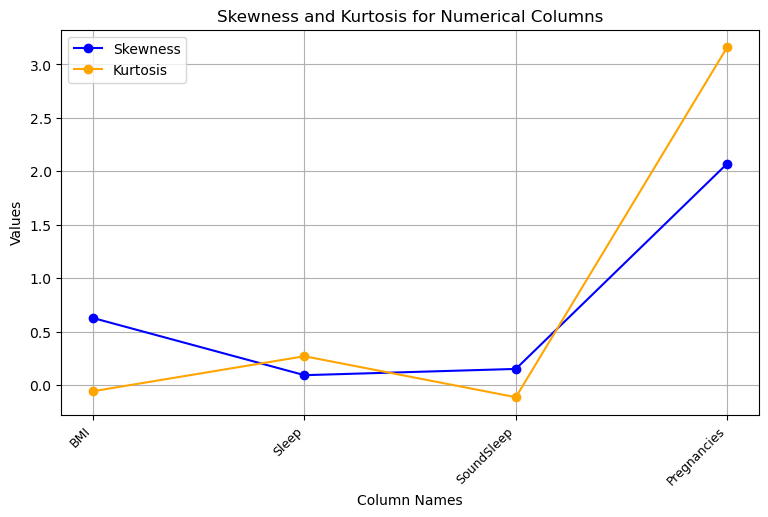

In [59]:
# Membuat objek figur untuk plot
plt.figure(figsize=(9, 5))

# Plot garis untuk skewness
plt.plot(skew_kurt_df.index, skew_kurt_df['Skewness'], marker='o', linestyle='-', color='blue', label='Skewness')
# Plot garis untuk kurtosis
plt.plot(skew_kurt_df.index, skew_kurt_df['Kurtosis'], marker='o', linestyle='-', color='orange', label='Kurtosis')

# Menambahkan judul dan label sumbu
plt.title('Skewness and Kurtosis for Numerical Columns')
plt.xlabel('Column Names')
plt.ylabel('Values')

# Menambahkan legenda
plt.legend()
# Menampilkan grid
plt.grid(True)
# Mengatur ukuran teks, rotasi, dan penempatan teks
plt.xticks(skew_kurt_df.index, skew_kurt_df.index, fontsize=9, rotation=45, ha='right') 

# Menampilkan grafik
plt.show()

<a id="import"></a>
<h2><b><span style="color:#005f26">🔶 Step 2 | </span><span style="color:#ff6200">Exploratory Data Analysis (EDA)</span></b></h2>

<a id="import"></a>
<h2><b><span style="color:#005f26">2.1 | </span><span style="color:#ff6200">Univariate Analysis</span></b></h2>

<a id="import"></a>
<h3><b><span style="color:#005f26">2.1.1 | </span><span style="color:#ff6200">Numerical Variables</span></b></h3>

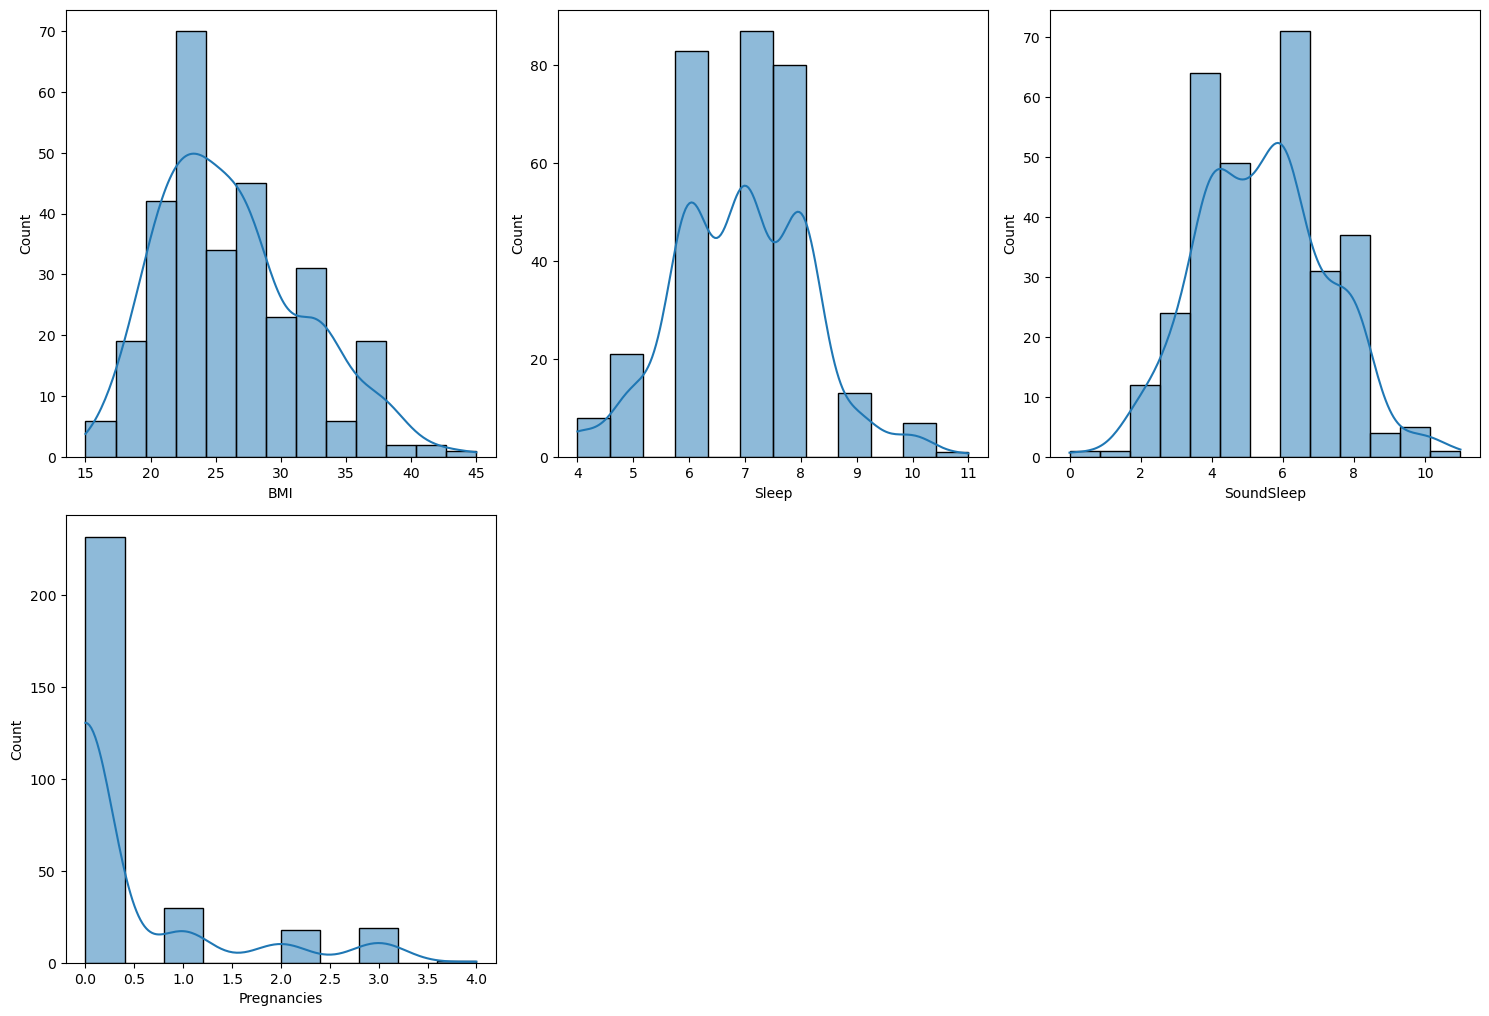

In [60]:
numerical_cols = ['BMI', 'Sleep', 'SoundSleep', 'Pregnancies']

plt.figure(figsize=(15, 25))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(x=col, data=df_diabetes, kde=True)

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Age')

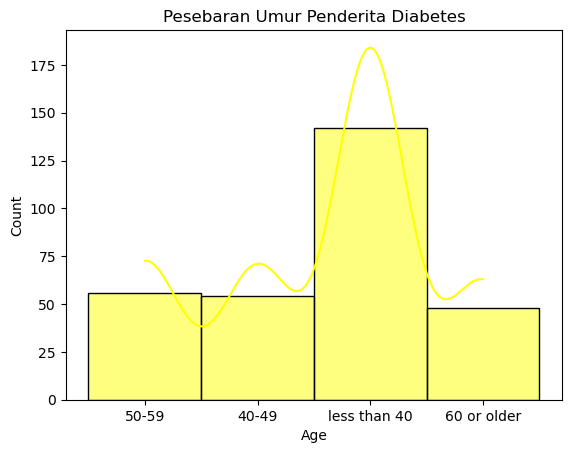

In [61]:
# melihat pesebaran data menggunakan Histogram
fig = plt.figure()
ax = sns.histplot(x=df_diabetes['Age'], kde=True, color='yellow')

plt.title("Pesebaran Umur Penderita Diabetes")
plt.xlabel("Age")

Dapat kita lihat, bahwa umur dengan rentang kurang dari 40 tahun memiliki tingkat persebaran terbanyak sebagai penderita diabetes.

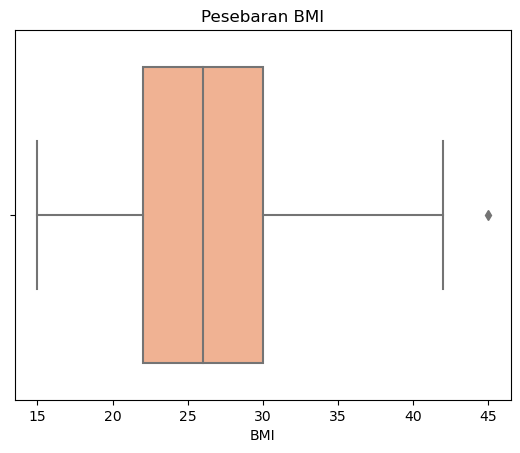

Skewness of BMI: 0.6278559568475263
Rentang BMI: 10.0 sampai 42.0


In [62]:
# Melihat pesebaran data menggunakan boxplot
fig = plt.figure()
ax = sns.boxplot(x='BMI', data = df_diabetes, color='#FFAD84')

plt.title("Pesebaran BMI")
plt.xlabel("BMI")

plt.show()
skewness = df_diabetes['BMI'].skew()
print(f"Skewness of BMI: {skewness}")

# Menampilkan rentang BMI berdasarkan boxplot
q1 = df_diabetes['BMI'].quantile(0.25)
q3 = df_diabetes['BMI'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Rentang BMI: {lower_bound} sampai {upper_bound}")

* Persebaran data `BMI` right-skewed
* Artinya, ekor panjang distribusi berada di sebelah kanan dan sebagian besar nilai BMI berkumpul di sebelah kiri.
* Distribusi BMI dalam dataset diabetes cenderung condong ke kanan (right-skewed), yang dapat mengindikasikan adanya nilai BMI yang lebih tinggi di antara penderita diabetes.
* Data banyak tersebar di rentang 11.5 sampai 39.5
* Terdapat 3 outliers yaitu nilai-nilai yang jauh dari median dan quartil.

<a id="import"></a>
<h3><b><span style="color:#005f26">2.1.2 | </span><span style="color:#ff6200">Categorical Variables</span></b></h3>

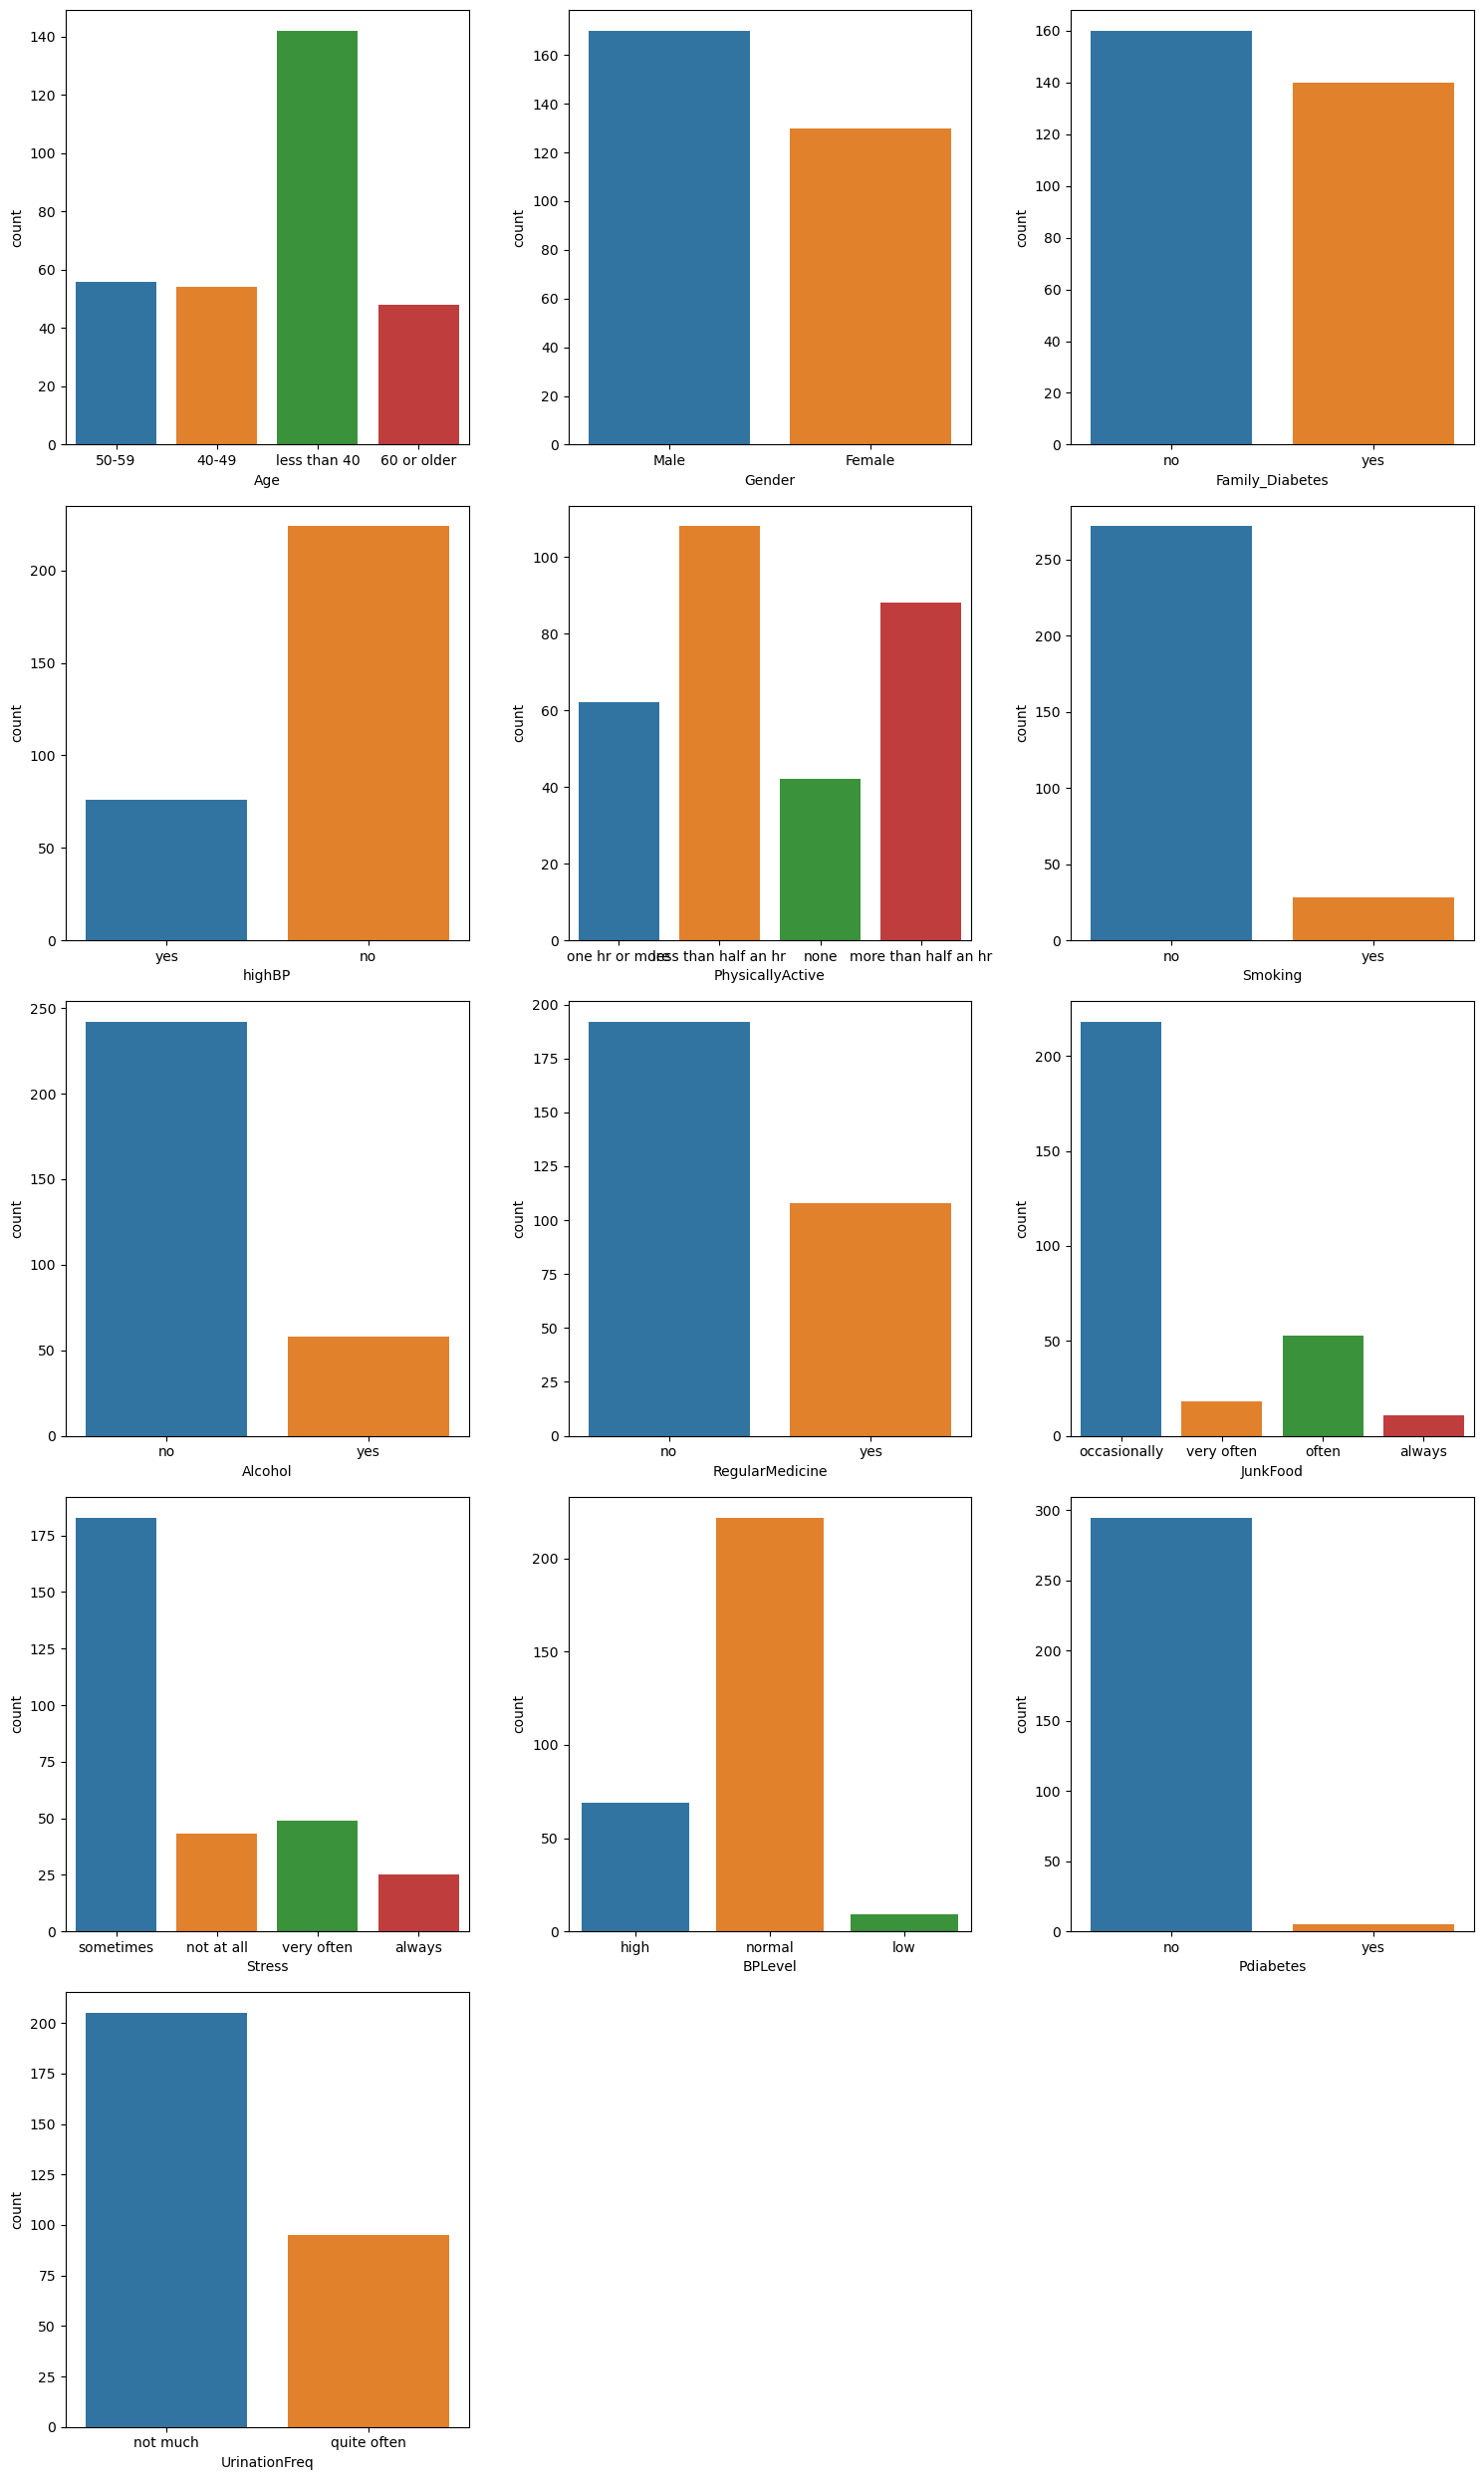

In [63]:
categorical_cols = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pdiabetes',
       'UrinationFreq']

plt.figure(figsize=(15, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=col, data=df_diabetes)

plt.tight_layout()
plt.show()

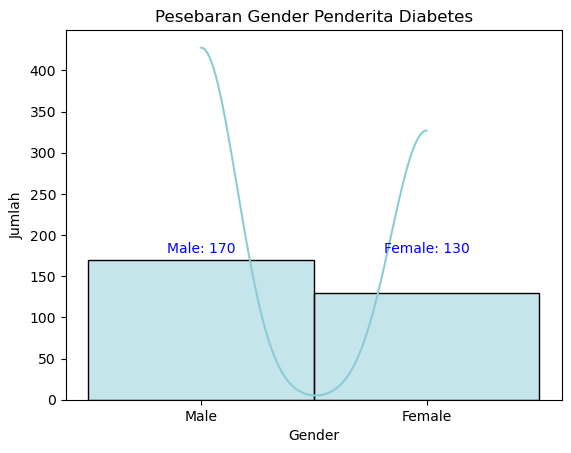

In [64]:
# melihat pesebaran data menggunakan Histogram
fig = plt.figure()
ax = sns.histplot(x=df_diabetes['Gender'], kde=True, color='#8ACDD7')

plt.title("Pesebaran Gender Penderita Diabetes")
plt.xlabel("Gender")
plt.ylabel("Jumlah")

# Menghitung jumlah jenis kelamin
count_male = df_diabetes[df_diabetes['Gender'] == 'Male'].shape[0]
count_female = df_diabetes[df_diabetes['Gender'] == 'Female'].shape[0]

plt.text(0, max(count_male, count_female) + 5, f'Male: {count_male}', ha='center', va='bottom', color='blue')
plt.text(1, max(count_male, count_female) + 5, f'Female: {count_female}', ha='center', va='bottom', color='blue')

plt.show()

Dari histogram diatas dapat disimpulkan bahwa jenis kelamin `Pria` sebagai penderita diabetes yang lebih banyak yaitu 170 dibandingkan jenis kelamin `Wanita` sebanyak 117.

<a id="import"></a>
<h2><b><span style="color:#005f26">2.2 | </span><span style="color:#ff6200">Bivariate Analysis</span></b></h2>

<a id="import"></a>
<h3><b><span style="color:#005f26">2.2.1 | </span><span style="color:#ff6200">Numerical Variables</span></b></h3>

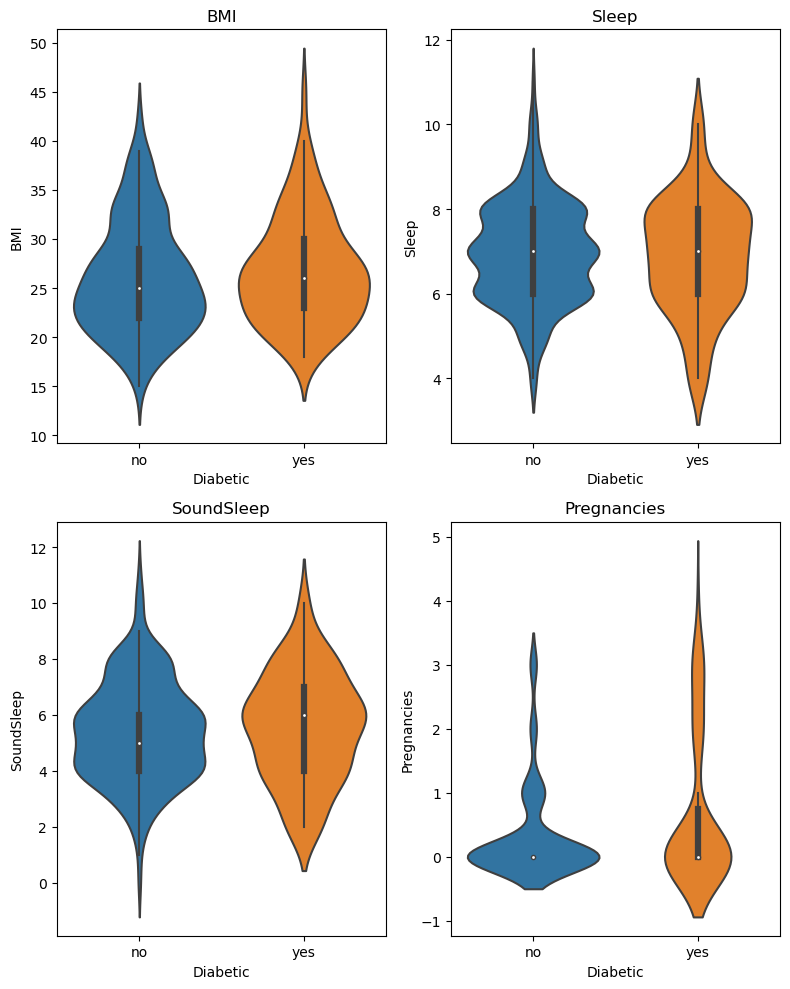

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(8, 10))

sns.violinplot(ax=axes[0, 0], data=df_diabetes, x='Diabetic', y='BMI')
axes[0, 0].set_title('BMI')

sns.violinplot(ax=axes[0, 1], data=df_diabetes, x='Diabetic', y='Sleep')
axes[0, 1].set_title('Sleep')

sns.violinplot(ax=axes[1, 0], data=df_diabetes, x='Diabetic', y='SoundSleep')
axes[1, 0].set_title('SoundSleep')

sns.violinplot(ax=axes[1, 1], data=df_diabetes, x='Diabetic', y='Pregnancies')
axes[1, 1].set_title('Pregnancies')

plt.tight_layout()
plt.show()

Skewness berdasarkan Aktivitas Fisik:
PhysicallyActive
less than half an hr    0.120388
more than half an hr    0.731201
none                    0.900267
one hr or more          0.828165
Name: BMI, dtype: float64


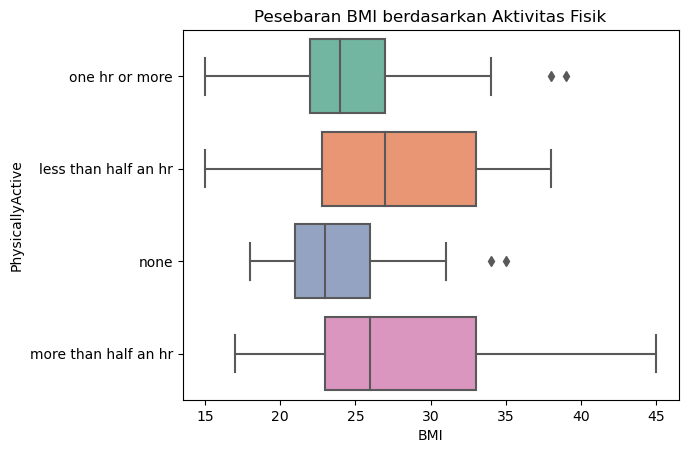

In [66]:
# Bivariate, Categorical vs Numerical
# Pesebaran BMI berdasarkan aktivitas fisik

fig = plt.figure()
ax = sns.boxplot(y = 'PhysicallyActive', x = 'BMI', data = df_diabetes, palette = 'Set2')
plt.title("Pesebaran BMI berdasarkan Aktivitas Fisik")
plt.xlabel("BMI")
plt.ylabel("PhysicallyActive")

# Menampilkan skewness untuk setiap kelompok
skewness_by_activity = df_diabetes.groupby('PhysicallyActive')['BMI'].skew()
print("Skewness berdasarkan Aktivitas Fisik:")
print(skewness_by_activity)

plt.show()

* Persebaran data `BMI` right-skewed
* Terdapat beberapa outliers yaitu nilai-nilai yang jauh dari median dan quartil. Namun ada yang tidak memiliki outliners

<a id="import"></a>
<h3><b><span style="color:#005f26">2.2.2 | </span><span style="color:#ff6200">Categorical Variables</span></b></h3>

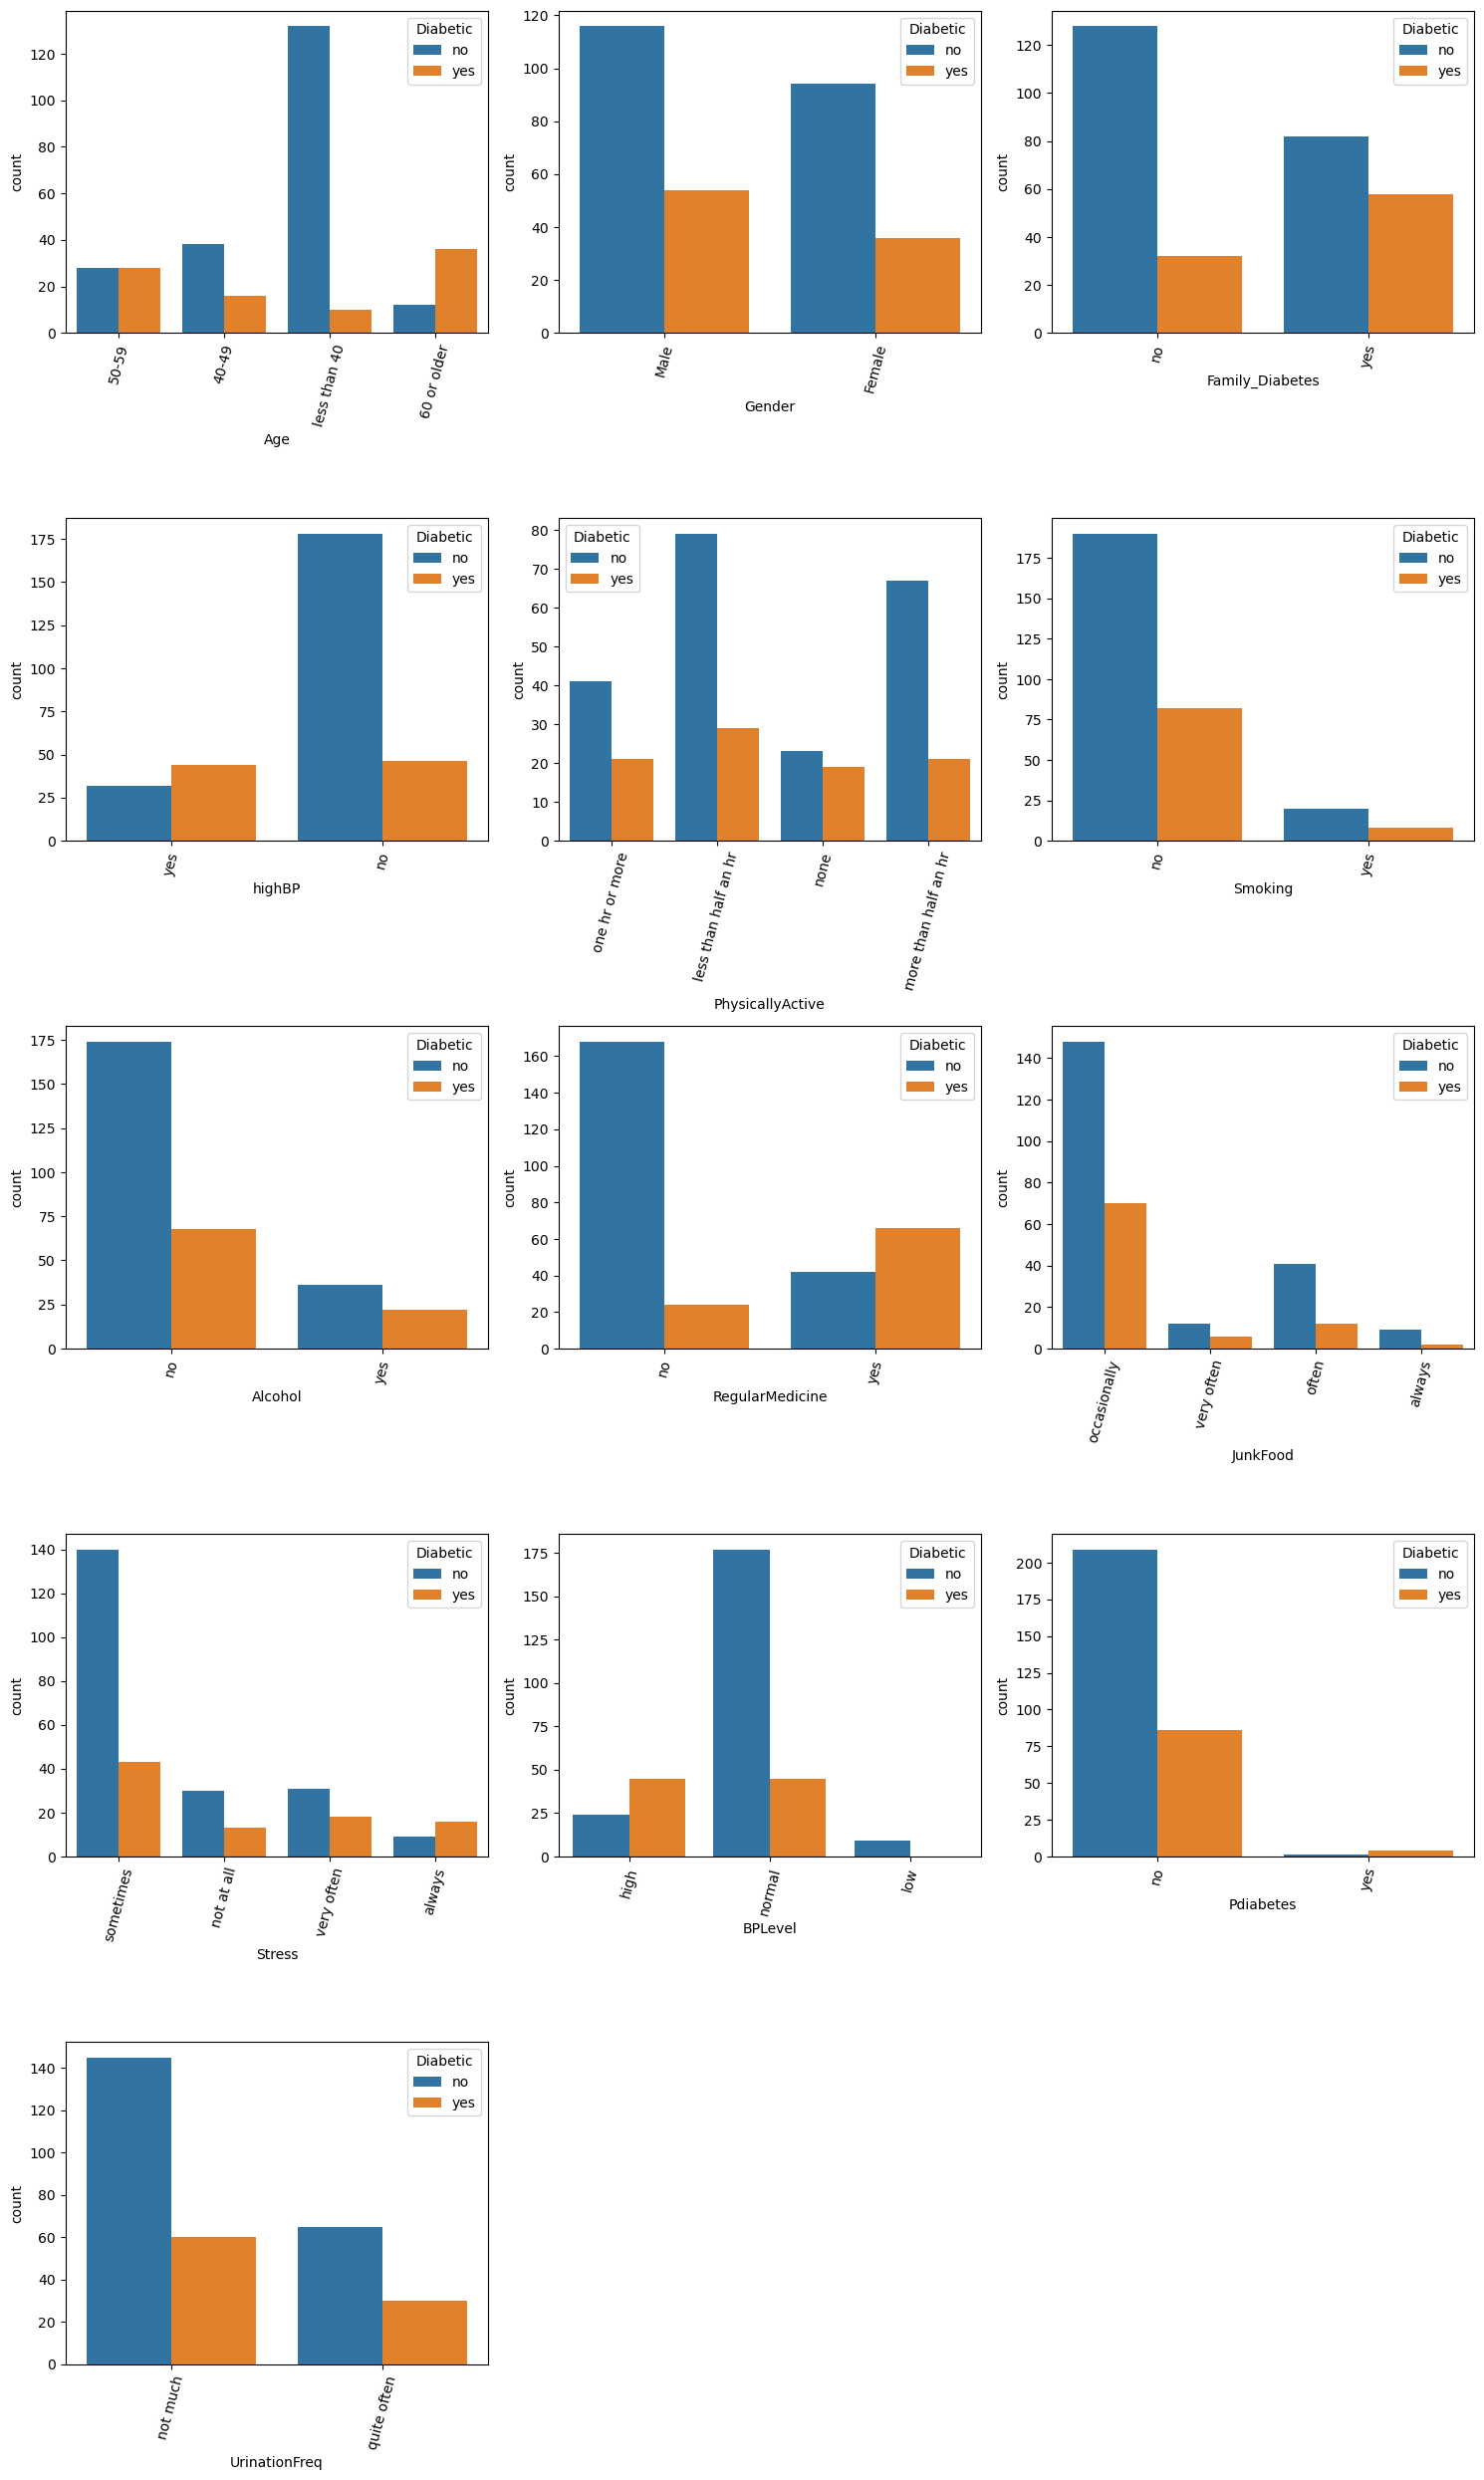

In [67]:
plt.figure(figsize=(15, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    plt.xticks(rotation=75)
    sns.countplot(x=col, hue='Diabetic', data=df_diabetes)

plt.tight_layout()
plt.show()

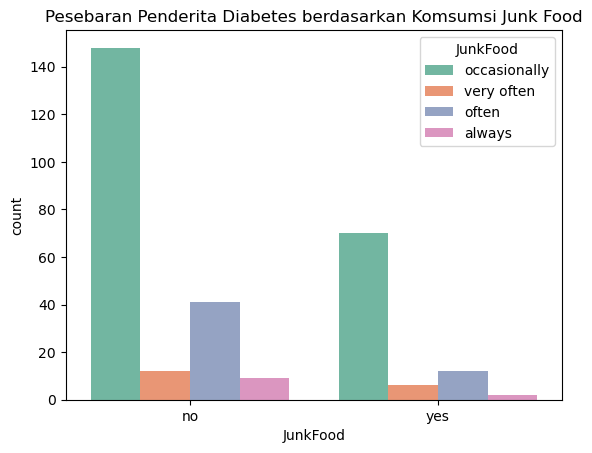

In [68]:
# Bivariate, Categorical vs Categorical
# Pesebaran Penderita Diabetes berdasarkan Komsumsi Junk Food

fig = plt.figure()
ax = sns.countplot(x = 'Diabetic', data = df_diabetes, hue = 'JunkFood', palette = 'Set2')
plt.title("Pesebaran Penderita Diabetes berdasarkan Komsumsi Junk Food")
plt.xlabel("JunkFood")

plt.show()

<a id="import"></a>
<h2><b><span style="color:#005f26">2.3 | </span><span style="color:#ff6200">Multivariate Analysis</span></b></h2>

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


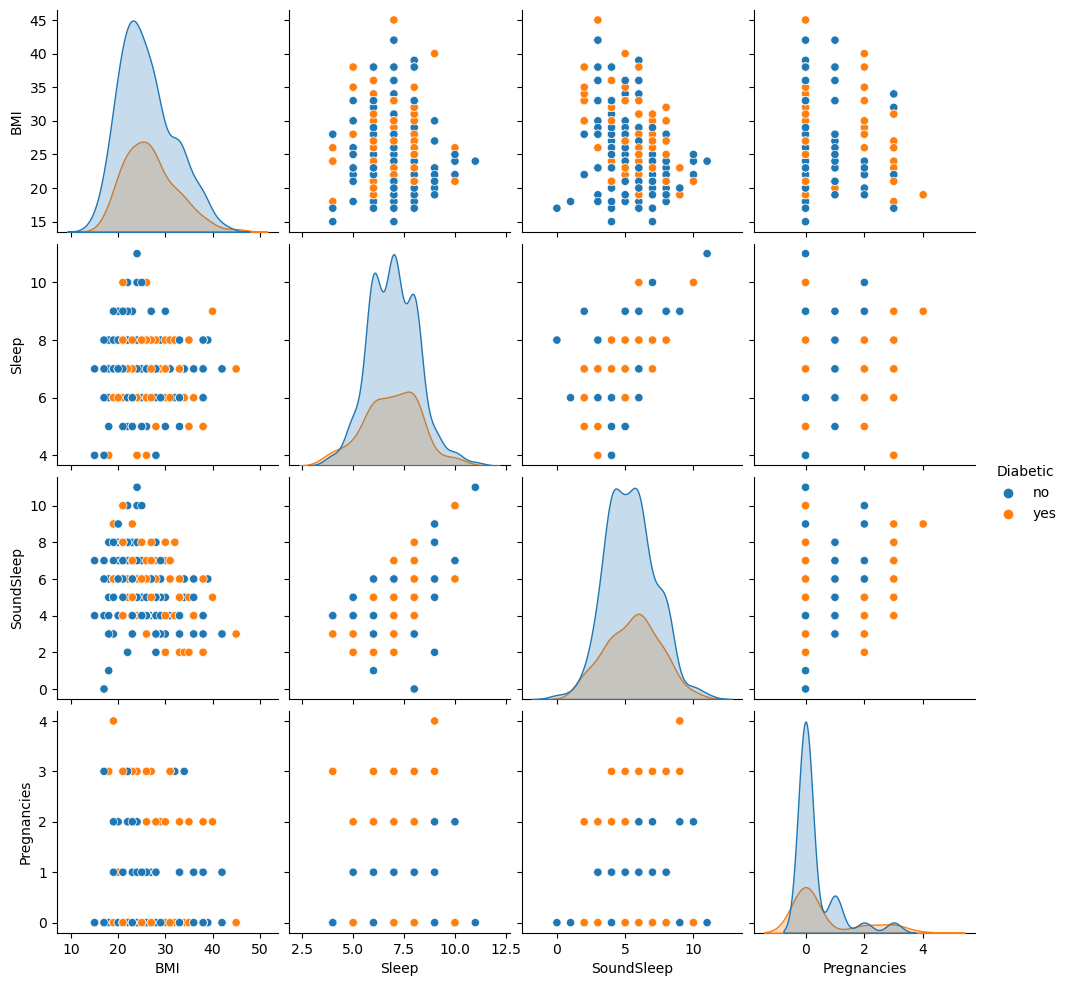

In [69]:
sns.pairplot(df_diabetes, hue = 'Diabetic')

<a id="import"></a>
<h2><b><span style="color:#005f26">2.4 | </span><span style="color:#ff6200">Correlation Matrix</span></b></h2>

Text(0.5, 1.0, 'Correlation Heatmap')

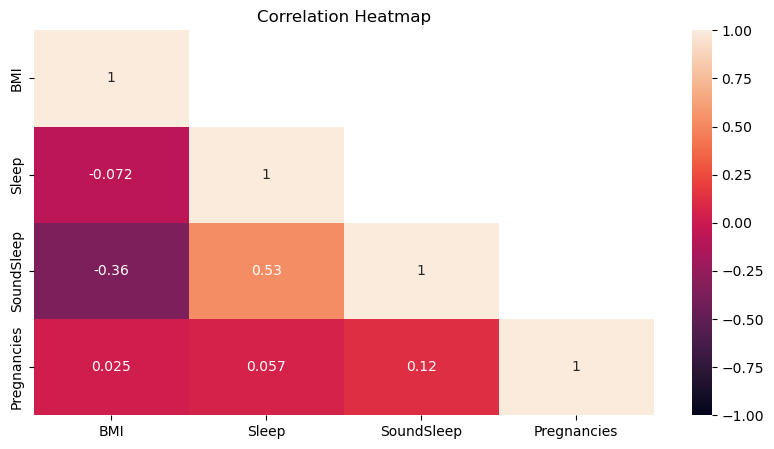

In [70]:
# visualisasi correlation setiap kolom numerik menggunakan heatmap
plt.figure(figsize=(10, 5))

# Explicitly select numerical columns
num_cols = df_diabetes.select_dtypes(include=['int64', 'float64'])

heatmap = sns.heatmap(num_cols.corr(), vmin=-1, vmax=1, annot=True, mask=np.triu(num_cols.corr(), k=1))
heatmap.set_title('Correlation Heatmap')

<a id="preprocessing"></a>
<h2><b><span style="color:#005f26">🔶 Step 3 | </span><span style="color:#ff6200">Label Encoding</span></b></h2>

In [71]:
# Label Encoding untuk kolom kategorikal
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'Smoking', 'Alcohol',
                        'RegularMedicine', 'JunkFood', 'Stress', 'BPLevel', 'Pdiabetes', 'UrinationFreq', 'Diabetic']

for column in categorical_columns:
    df_diabetes[column] = label_encoder.fit_transform(df_diabetes[column])

# One-Hot Encoding untuk kolom Age
df_diabetes = pd.get_dummies(df_diabetes, columns=['Age'], drop_first=True)

<a id="preprocessing"></a>
<h2><b><span style="color:#005f26">🔶 Step 4 | </span><span style="color:#ff6200">Data Scaling</span></b></h2>

In [72]:
# Scaling fitur numerik
scaler = StandardScaler()
numeric_features = ['BMI', 'Sleep', 'SoundSleep', 'Pregnancies']
df_diabetes[numeric_features] = scaler.fit_transform(df_diabetes[numeric_features])

<a id="preprocessing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5 | </span><span style="color:#ff6200">Handle Imbalance Data</span></b></h2>

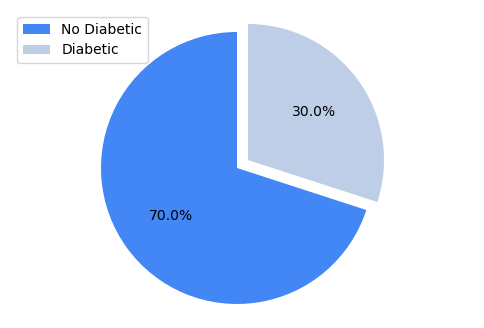

In [73]:
diabetic_label = ['No Diabetic', 'Diabetic']
diabetic_count = list(df_diabetes['Diabetic'].value_counts())
colors_df = ['#4287f5', '#becee6']
explode = (0.1, 0)
fig, ax = plt.subplots(figsize=(6, 4))
ax.pie(diabetic_count, explode=explode, autopct='%.1f%%',
        shadow=False, startangle=90, colors=colors_df)
ax.axis('equal')
plt.legend(diabetic_label, loc='best')
plt.show()

In [74]:
# Handle Imbalanced Data with SMOTE
X = df_diabetes.drop('Diabetic', axis=1)
y = df_diabetes['Diabetic']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

<a id="preprocessing"></a>
<h2><b><span style="color:#005f26">🔶 Step 6 | </span><span style="color:#ff6200">Train Test Split</span></b></h2>

In [75]:
# Train Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

<a id="preprocessing"></a>
<h2><b><span style="color:#005f26">🔶 Step 7 | </span><span style="color:#ff6200">Modelling and Evaluation (Classification)</span></b></h2>

<a id="summary"></a>
<h2><b><span style="color:#005f26">7.1 | </span><span style="color:#ff6200">Random Forest Classifier</span></b></h2>

Random Forest Accuracy: 0.8650793650793651
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        69
           1       0.83      0.88      0.85        57

    accuracy                           0.87       126
   macro avg       0.86      0.87      0.86       126
weighted avg       0.87      0.87      0.87       126

Random Forest Confusion Matrix:
[[59 10]
 [ 7 50]]
Random Forest ROC AUC: 0.906559877955759


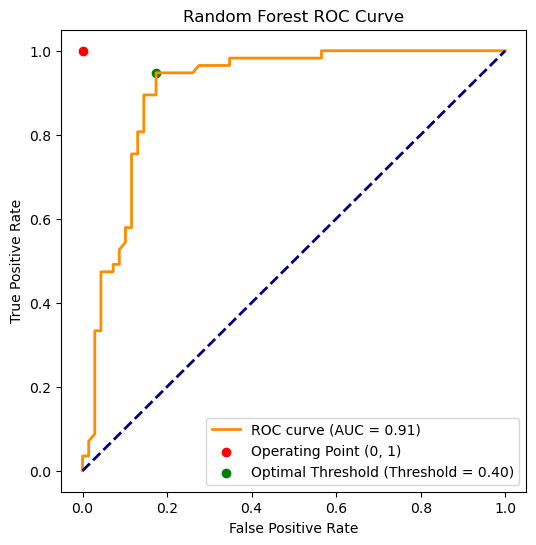

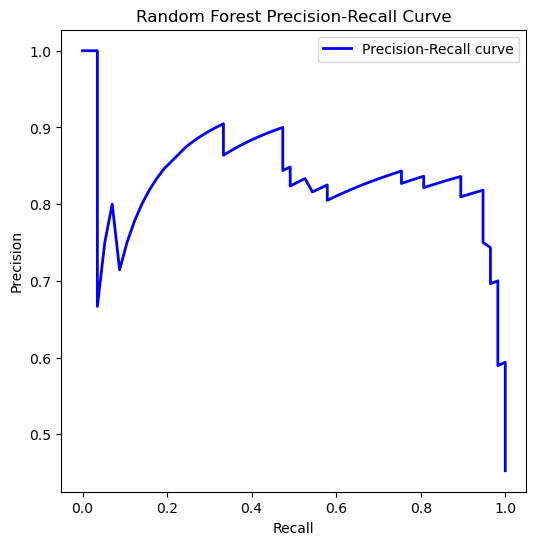

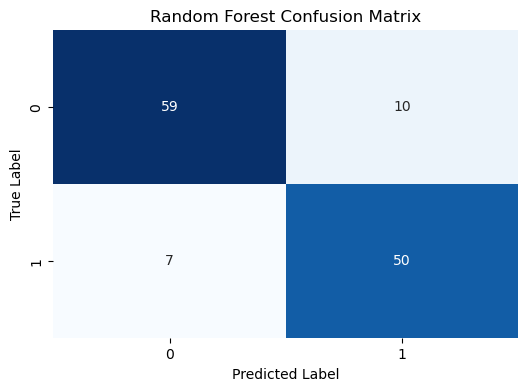

In [76]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')

classification_rep = classification_report(y_test, y_pred)
print(f'Random Forest Classification Report:\n{classification_rep}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Random Forest Confusion Matrix:\n{conf_matrix}')

# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'Random Forest ROC AUC: {roc_auc}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">7.2 | </span><span style="color:#ff6200">Decision Tree Classifier</span></b></h2>

Decision Tree Accuracy: 0.753968253968254
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78        69
           1       0.73      0.72      0.73        57

    accuracy                           0.75       126
   macro avg       0.75      0.75      0.75       126
weighted avg       0.75      0.75      0.75       126

Decision Tree Confusion Matrix:
[[54 15]
 [16 41]]
Decision Tree ROC AUC: 0.7791762013729976


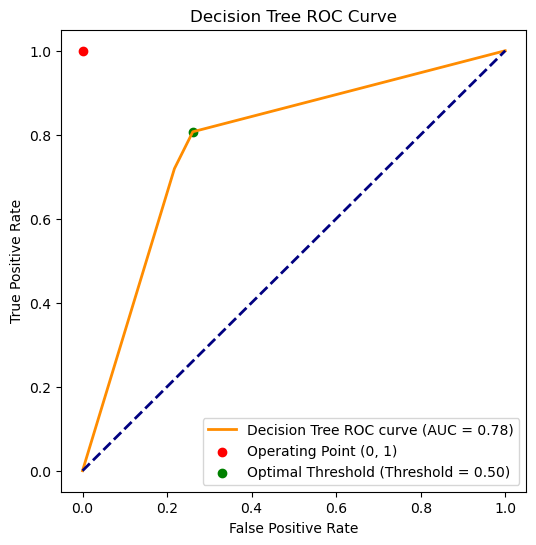

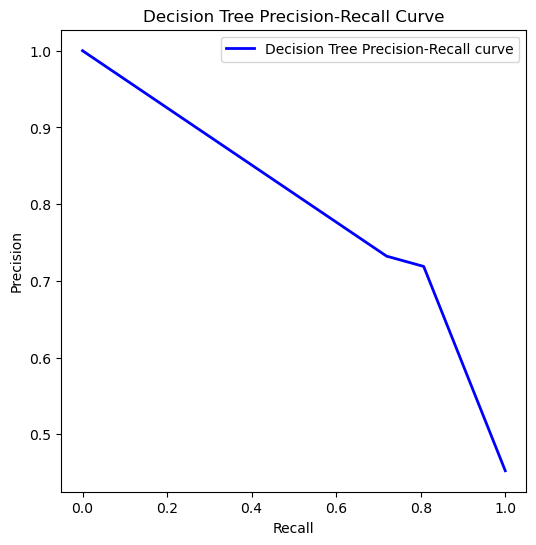

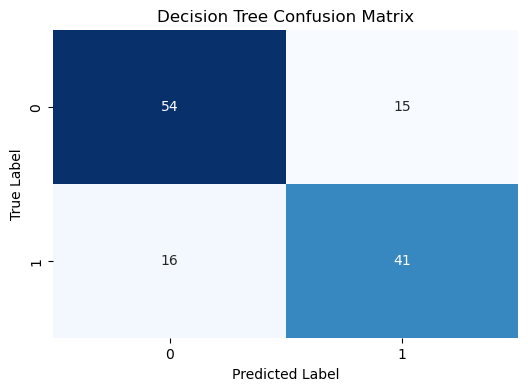

In [77]:
# Model Training
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Model Prediction
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree}')

classification_rep_tree = classification_report(y_test, y_pred_tree)
print(f'Decision Tree Classification Report:\n{classification_rep_tree}')

conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(f'Decision Tree Confusion Matrix:\n{conf_matrix_tree}')

# ROC AUC
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)
print(f'Decision Tree ROC AUC: {roc_auc_tree}')

# ROC Curve
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob_tree)
optimal_threshold_tree_index = np.argmax(tpr_tree - fpr_tree)
optimal_threshold_tree = thresholds_tree[optimal_threshold_tree_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'Decision Tree ROC curve (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_tree[optimal_threshold_tree_index], tpr_tree[optimal_threshold_tree_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_tree:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_tree, recall_tree, _ = precision_recall_curve(y_test, y_prob_tree)

plt.figure(figsize=(6, 6))
plt.plot(recall_tree, precision_tree, color='blue', lw=2, label='Decision Tree Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">7.3 | </span><span style="color:#ff6200">SVM Classifier</span></b></h2>

SVM Classifier Accuracy: 0.8571428571428571
SVM Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        69
           1       0.79      0.93      0.85        57

    accuracy                           0.86       126
   macro avg       0.86      0.86      0.86       126
weighted avg       0.87      0.86      0.86       126

SVM Classifier Confusion Matrix:
[[55 14]
 [ 4 53]]
SVM Classifier ROC AUC: 0.9159674548690567


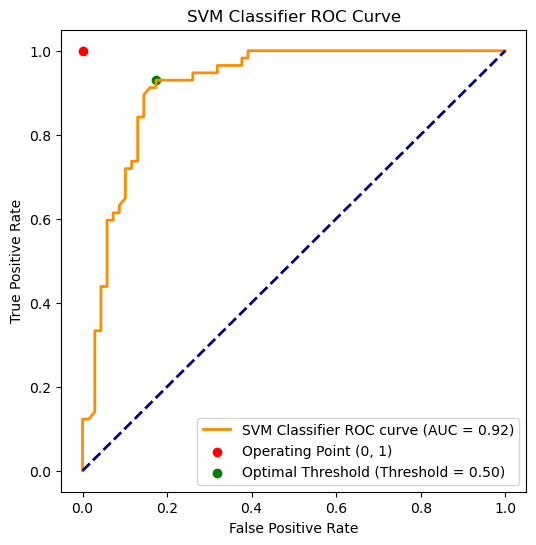

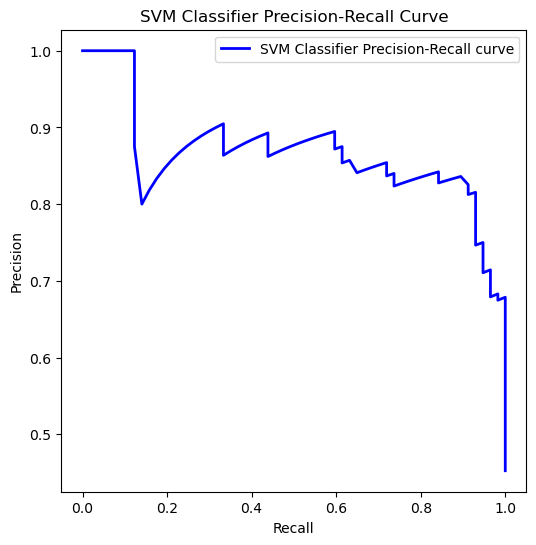

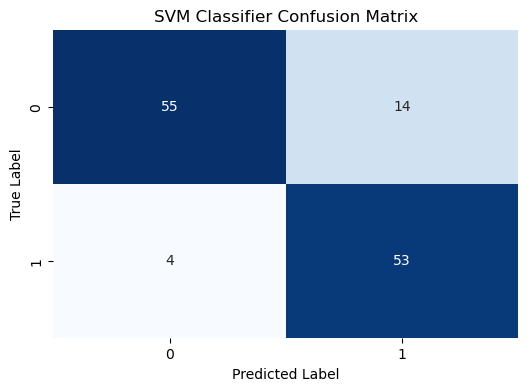

In [78]:
# Model Training
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Model Prediction
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Classifier Accuracy: {accuracy_svm}')

classification_rep_svm = classification_report(y_test, y_pred_svm)
print(f'SVM Classifier Classification Report:\n{classification_rep_svm}')

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(f'SVM Classifier Confusion Matrix:\n{conf_matrix_svm}')

# ROC AUC
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f'SVM Classifier ROC AUC: {roc_auc_svm}')

# ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
optimal_threshold_svm_index = np.argmax(tpr_svm - fpr_svm)
optimal_threshold_svm = thresholds_svm[optimal_threshold_svm_index]

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM Classifier ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_svm[optimal_threshold_svm_index], tpr_svm[optimal_threshold_svm_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_svm:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)

plt.figure(figsize=(6, 6))
plt.plot(recall_svm, precision_svm, color='blue', lw=2, label='SVM Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Classifier Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">7.4 | </span><span style="color:#ff6200">KNN Classifier</span></b></h2>

KNN Classifier Accuracy: 0.8571428571428571
KNN Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        69
           1       0.80      0.91      0.85        57

    accuracy                           0.86       126
   macro avg       0.86      0.86      0.86       126
weighted avg       0.86      0.86      0.86       126

KNN Classifier Confusion Matrix:
[[56 13]
 [ 5 52]]
KNN Classifier ROC AUC: 0.9174930078820239


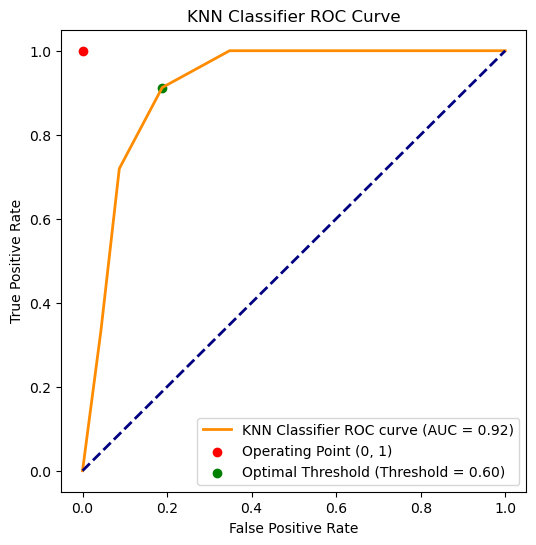

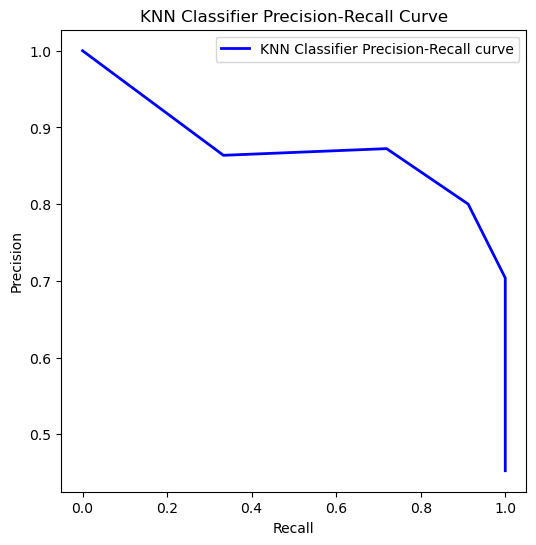

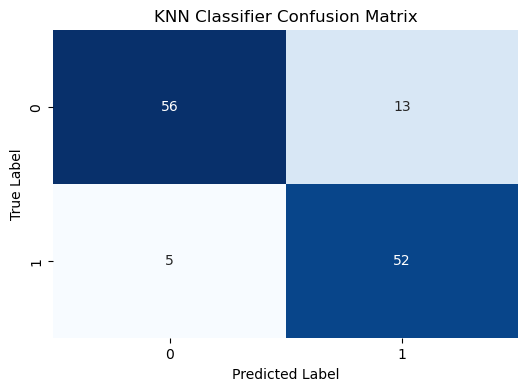

In [79]:
# Model Training
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Model Prediction
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Classifier Accuracy: {accuracy_knn}')

classification_rep_knn = classification_report(y_test, y_pred_knn)
print(f'KNN Classifier Classification Report:\n{classification_rep_knn}')

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'KNN Classifier Confusion Matrix:\n{conf_matrix_knn}')

# ROC AUC
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f'KNN Classifier ROC AUC: {roc_auc_knn}')

# ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
optimal_threshold_knn_index = np.argmax(tpr_knn - fpr_knn)
optimal_threshold_knn = thresholds_knn[optimal_threshold_knn_index]

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'KNN Classifier ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_knn[optimal_threshold_knn_index], tpr_knn[optimal_threshold_knn_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn)

plt.figure(figsize=(6, 6))
plt.plot(recall_knn, precision_knn, color='blue', lw=2, label='KNN Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('KNN Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN Classifier Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">7.5 | </span><span style="color:#ff6200">XGBoost Classifier</span></b></h2>

XGBoost Classifier Accuracy: 0.8333333333333334
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        69
           1       0.80      0.84      0.82        57

    accuracy                           0.83       126
   macro avg       0.83      0.83      0.83       126
weighted avg       0.83      0.83      0.83       126

XGBoost Classifier Confusion Matrix:
[[57 12]
 [ 9 48]]
XGBoost Classifier ROC AUC: 0.9136791253496059


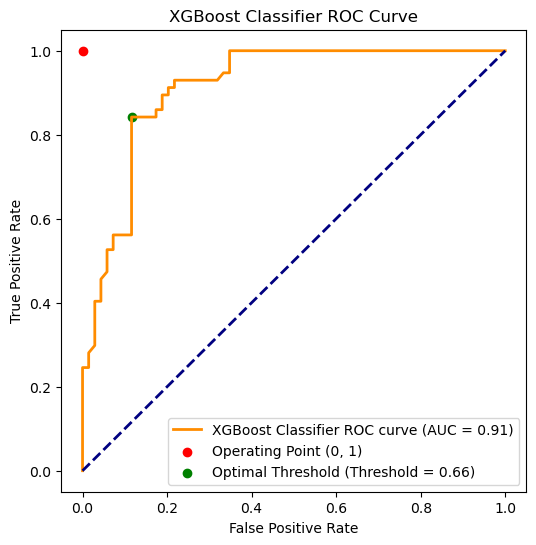

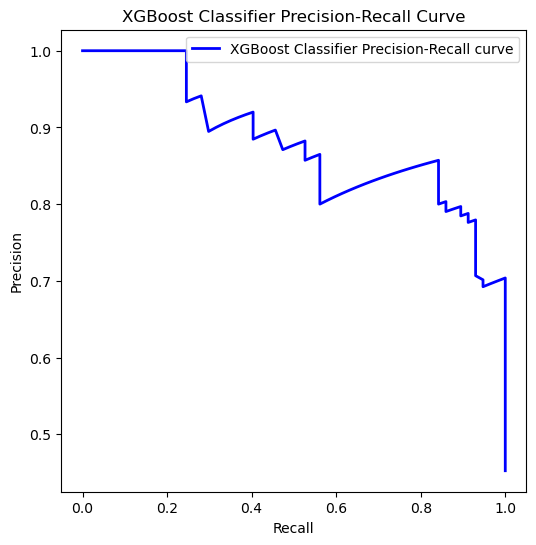

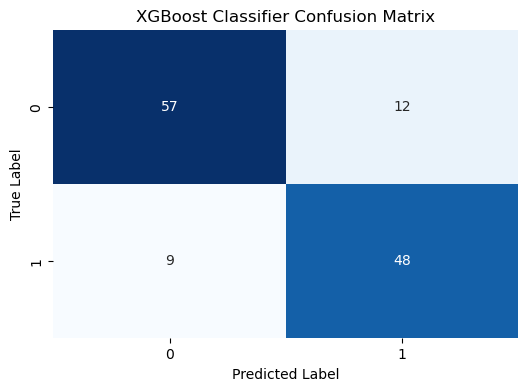

In [80]:
# Model Training
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Model Prediction
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Classifier Accuracy: {accuracy_xgb}')

classification_rep_xgb = classification_report(y_test, y_pred_xgb)
print(f'XGBoost Classifier Classification Report:\n{classification_rep_xgb}')

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f'XGBoost Classifier Confusion Matrix:\n{conf_matrix_xgb}')

# ROC AUC
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print(f'XGBoost Classifier ROC AUC: {roc_auc_xgb}')

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
optimal_threshold_xgb_index = np.argmax(tpr_xgb - fpr_xgb)
optimal_threshold_xgb = thresholds_xgb[optimal_threshold_xgb_index]

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost Classifier ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_xgb[optimal_threshold_xgb_index], tpr_xgb[optimal_threshold_xgb_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_xgb:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
plt.figure(figsize=(6, 6))
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label='XGBoost Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Classifier Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">7.6 | </span><span style="color:#ff6200">Logistic Regression</span></b></h2>

Logistic Regression Accuracy: 0.8253968253968254
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        69
           1       0.80      0.82      0.81        57

    accuracy                           0.83       126
   macro avg       0.82      0.83      0.82       126
weighted avg       0.83      0.83      0.83       126

Logistic Regression Confusion Matrix:
[[57 12]
 [10 47]]
Logistic Regression ROC AUC: 0.8918128654970761


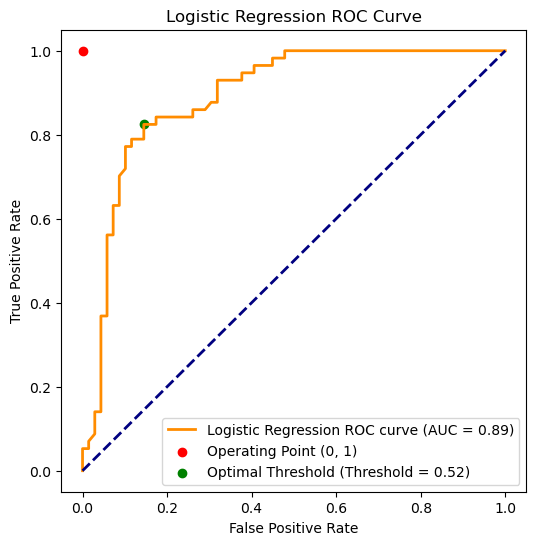

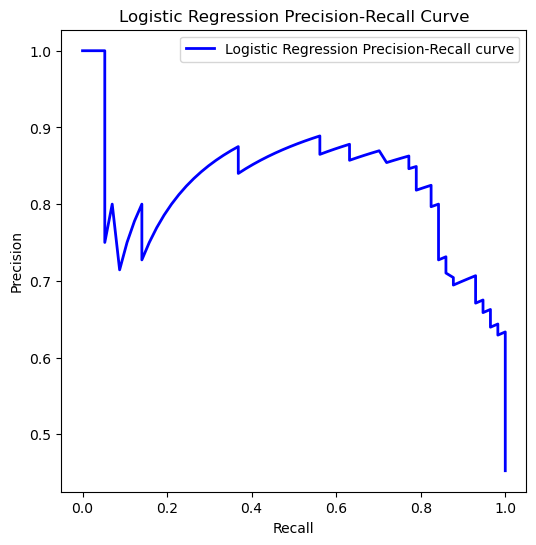

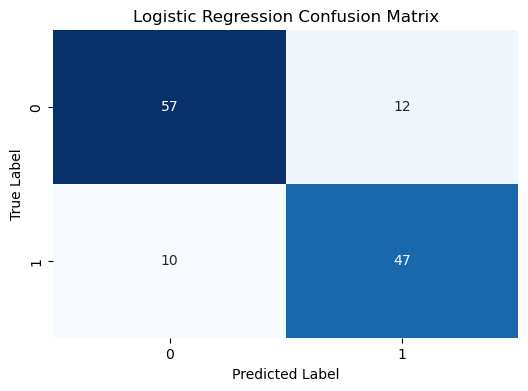

In [81]:
# Model Training
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Model Prediction
y_pred_logreg = logreg_model.predict(X_test)
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')

classification_rep_logreg = classification_report(y_test, y_pred_logreg)
print(f'Logistic Regression Classification Report:\n{classification_rep_logreg}')

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(f'Logistic Regression Confusion Matrix:\n{conf_matrix_logreg}')

# ROC AUC
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print(f'Logistic Regression ROC AUC: {roc_auc_logreg}')

# ROC Curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
optimal_threshold_logreg_index = np.argmax(tpr_logreg - fpr_logreg)
optimal_threshold_logreg = thresholds_logreg[optimal_threshold_logreg_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression ROC curve (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_logreg[optimal_threshold_logreg_index], tpr_logreg[optimal_threshold_logreg_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_logreg:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_prob_logreg)

plt.figure(figsize=(6, 6))
plt.plot(recall_logreg, precision_logreg, color='blue', lw=2, label='Logistic Regression Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">7.7 | </span><span style="color:#ff6200">MLP Classifier</span></b></h2>

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier Accuracy: 0.8571428571428571
MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        69
           1       0.83      0.86      0.84        57

    accuracy                           0.86       126
   macro avg       0.86      0.86      0.86       126
weighted avg       0.86      0.86      0.86       126

MLP Classifier Confusion Matrix:
[[59 10]
 [ 8 49]]
MLP Classifier ROC AUC: 0.9182557843885075


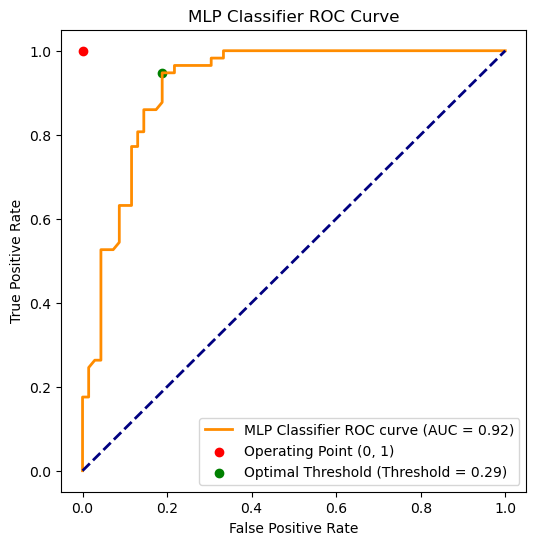

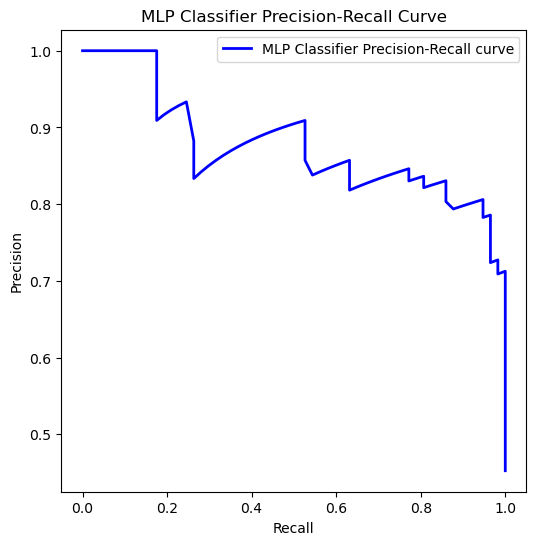

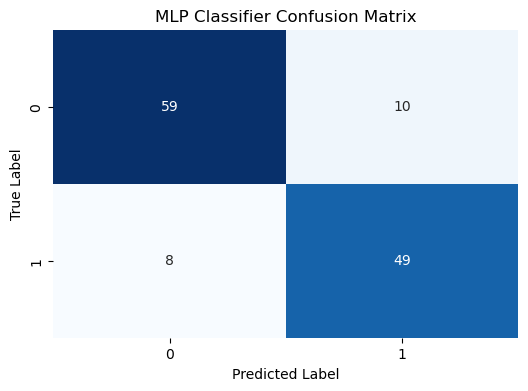

In [82]:
# Model Training
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)

# Model Prediction
y_pred_mlp = mlp_model.predict(X_test)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'MLP Classifier Accuracy: {accuracy_mlp}')

classification_rep_mlp = classification_report(y_test, y_pred_mlp)
print(f'MLP Classifier Classification Report:\n{classification_rep_mlp}')

conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print(f'MLP Classifier Confusion Matrix:\n{conf_matrix_mlp}')

# ROC AUC
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)
print(f'MLP Classifier ROC AUC: {roc_auc_mlp}')

# ROC Curve
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_prob_mlp)
optimal_threshold_mlp_index = np.argmax(tpr_mlp - fpr_mlp)
optimal_threshold_mlp = thresholds_mlp[optimal_threshold_mlp_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP Classifier ROC curve (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_mlp[optimal_threshold_mlp_index], tpr_mlp[optimal_threshold_mlp_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_mlp:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_mlp, recall_mlp, _ = precision_recall_curve(y_test, y_prob_mlp)

plt.figure(figsize=(6, 6))
plt.plot(recall_mlp, precision_mlp, color='blue', lw=2, label='MLP Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('MLP Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MLP Classifier Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">7.8 | </span><span style="color:#ff6200">Gradient Boosting</span></b></h2>

Gradient Boosting Classifier Accuracy: 0.8174603174603174
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        69
           1       0.80      0.79      0.80        57

    accuracy                           0.82       126
   macro avg       0.82      0.82      0.82       126
weighted avg       0.82      0.82      0.82       126

Gradient Boosting Classifier Confusion Matrix:
[[58 11]
 [12 45]]
Gradient Boosting Classifier ROC AUC: 0.910882278159166


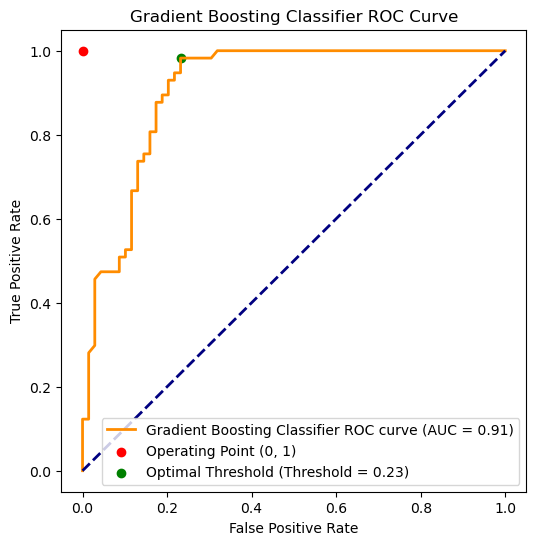

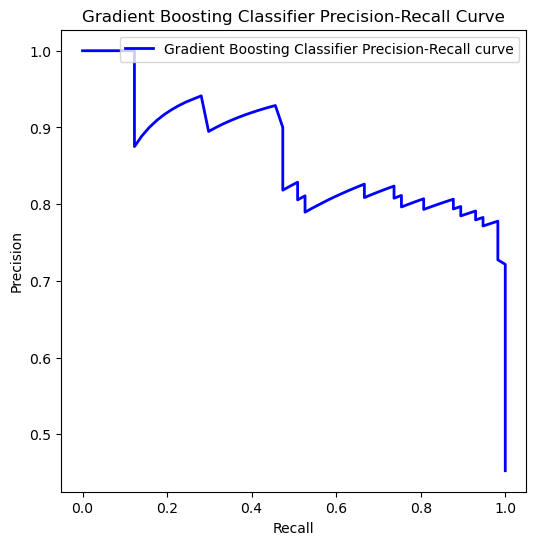

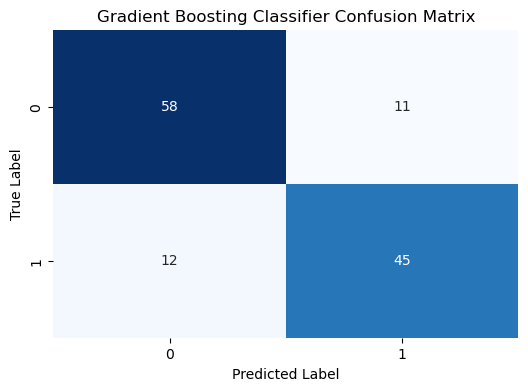

In [83]:
# Model Training
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Model Prediction
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Classifier Accuracy: {accuracy_gb}')

classification_rep_gb = classification_report(y_test, y_pred_gb)
print(f'Gradient Boosting Classifier Classification Report:\n{classification_rep_gb}')

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(f'Gradient Boosting Classifier Confusion Matrix:\n{conf_matrix_gb}')

# ROC AUC
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
print(f'Gradient Boosting Classifier ROC AUC: {roc_auc_gb}')

# ROC Curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
optimal_threshold_gb_index = np.argmax(tpr_gb - fpr_gb)
optimal_threshold_gb = thresholds_gb[optimal_threshold_gb_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting Classifier ROC curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_gb[optimal_threshold_gb_index], tpr_gb[optimal_threshold_gb_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_gb:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_prob_gb)

plt.figure(figsize=(6, 6))
plt.plot(recall_gb, precision_gb, color='blue', lw=2, label='Gradient Boosting Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Gradient Boosting Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

<a id="preprocessing"></a>
<h2><b><span style="color:#005f26">🔶 Step 8 | </span><span style="color:#ff6200">Model Tuning</span></b></h2>

<a id="summary"></a>
<h2><b><span style="color:#005f26">8.1 | </span><span style="color:#ff6200">Random Forest Classifier</span></b></h2>

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Tuned Random Forest Accuracy: 0.873015873015873
Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        69
           1       0.85      0.88      0.86        57

    accuracy                           0.87       126
   macro avg       0.87      0.87      0.87       126
weighted avg       0.87      0.87      0.87       126

Tuned Random Forest Confusion Matrix:
[[60  9]
 [ 7 50]]
Tuned Random Forest ROC AUC: 0.9233409610983981


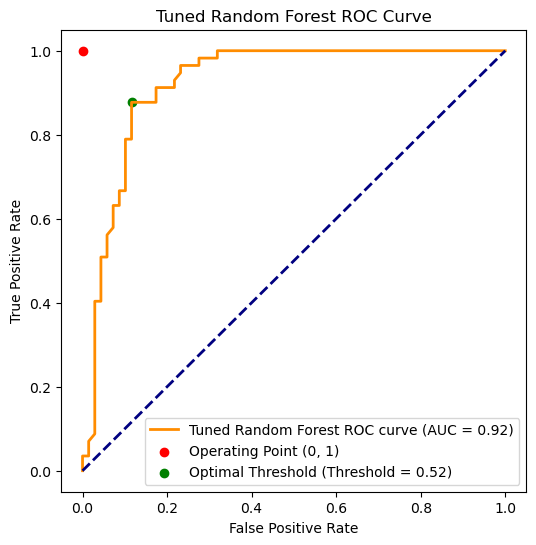

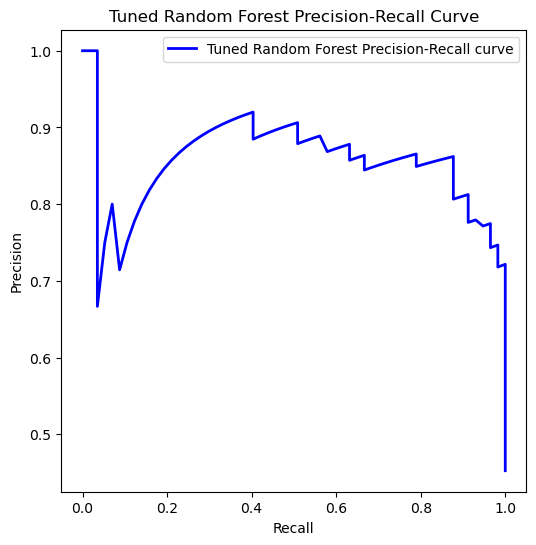

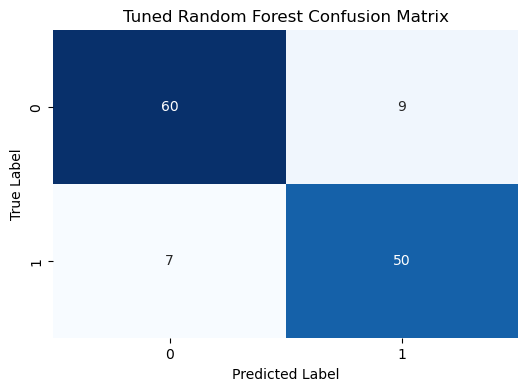

In [84]:
# Hyperparameter Grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Grid Search
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Hyperparameter Terbaik
best_params_rf = grid_search_rf.best_params_
print(f'Best Hyperparameters for Random Forest: {best_params_rf}')

# Model dengan Hyperparameter Terbaik
best_rf_model = grid_search_rf.best_estimator_

# Model Training
best_rf_model.fit(X_train, y_train)

# Model Prediction
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_prob_rf_tuned = best_rf_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f'Tuned Random Forest Accuracy: {accuracy_rf_tuned}')

classification_rep_rf_tuned = classification_report(y_test, y_pred_rf_tuned)
print(f'Tuned Random Forest Classification Report:\n{classification_rep_rf_tuned}')

conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
print(f'Tuned Random Forest Confusion Matrix:\n{conf_matrix_rf_tuned}')

# ROC AUC
roc_auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)
print(f'Tuned Random Forest ROC AUC: {roc_auc_rf_tuned}')

# ROC Curve
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test, y_prob_rf_tuned)
optimal_threshold_rf_tuned_index = np.argmax(tpr_rf_tuned - fpr_rf_tuned)
optimal_threshold_rf_tuned = thresholds_rf_tuned[optimal_threshold_rf_tuned_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='darkorange', lw=2, label=f'Tuned Random Forest ROC curve (AUC = {roc_auc_rf_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_rf_tuned[optimal_threshold_rf_tuned_index], tpr_rf_tuned[optimal_threshold_rf_tuned_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_rf_tuned:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_rf_tuned, recall_rf_tuned, _ = precision_recall_curve(y_test, y_prob_rf_tuned)

plt.figure(figsize=(6, 6))
plt.plot(recall_rf_tuned, precision_rf_tuned, color='blue', lw=2, label='Tuned Random Forest Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Random Forest Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">8.2 | </span><span style="color:#ff6200">Decision Tree Classifier</span></b></h2>

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Tuned Decision Tree Accuracy: 0.7380952380952381
Tuned Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        69
           1       0.73      0.67      0.70        57

    accuracy                           0.74       126
   macro avg       0.74      0.73      0.73       126
weighted avg       0.74      0.74      0.74       126

Tuned Decision Tree Confusion Matrix:
[[55 14]
 [19 38]]
Tuned Decision Tree ROC AUC: 0.7645563183320621


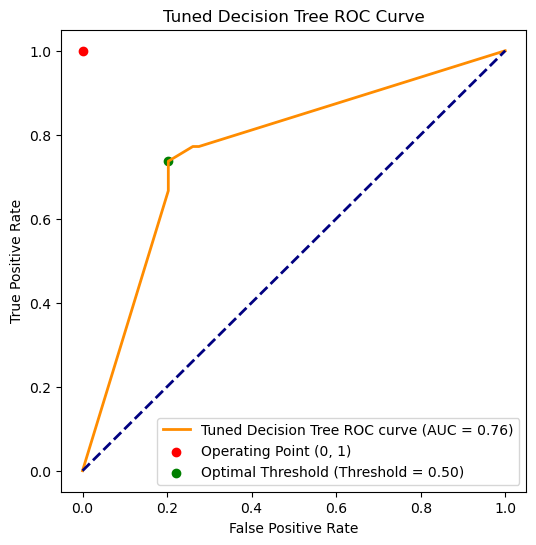

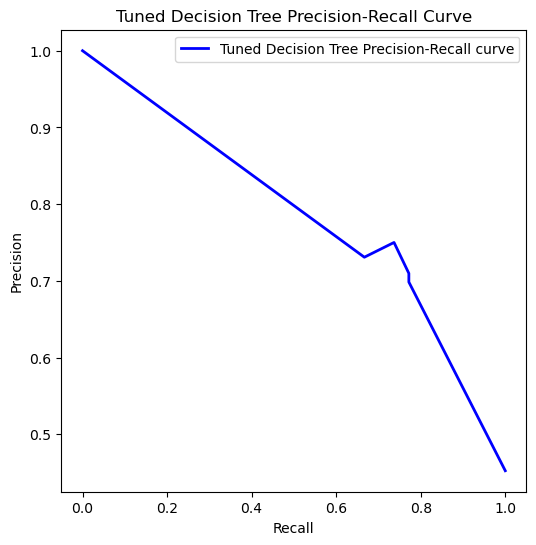

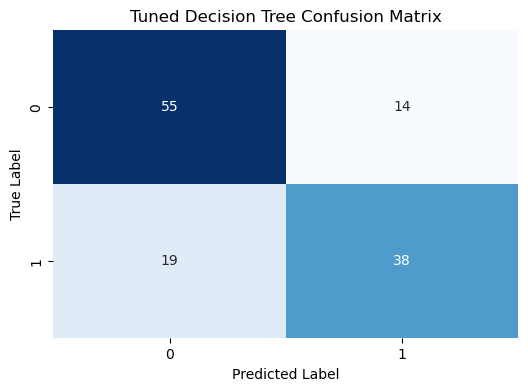

In [85]:
# Hyperparameter Grid
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search_tree = GridSearchCV(tree_model, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

# Hyperparameter Terbaik
best_params_tree = grid_search_tree.best_params_
print(f'Best Hyperparameters for Decision Tree: {best_params_tree}')

# Model dengan Hyperparameter Terbaik
best_tree_model = grid_search_tree.best_estimator_

# Model Training
best_tree_model.fit(X_train, y_train)

# Model Prediction
y_pred_tree_tuned = best_tree_model.predict(X_test)
y_prob_tree_tuned = best_tree_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_tree_tuned = accuracy_score(y_test, y_pred_tree_tuned)
print(f'Tuned Decision Tree Accuracy: {accuracy_tree_tuned}')

classification_rep_tree_tuned = classification_report(y_test, y_pred_tree_tuned)
print(f'Tuned Decision Tree Classification Report:\n{classification_rep_tree_tuned}')

conf_matrix_tree_tuned = confusion_matrix(y_test, y_pred_tree_tuned)
print(f'Tuned Decision Tree Confusion Matrix:\n{conf_matrix_tree_tuned}')

# ROC AUC
roc_auc_tree_tuned = roc_auc_score(y_test, y_prob_tree_tuned)
print(f'Tuned Decision Tree ROC AUC: {roc_auc_tree_tuned}')

# ROC Curve
fpr_tree_tuned, tpr_tree_tuned, thresholds_tree_tuned = roc_curve(y_test, y_prob_tree_tuned)
optimal_threshold_tree_tuned_index = np.argmax(tpr_tree_tuned - fpr_tree_tuned)
optimal_threshold_tree_tuned = thresholds_tree_tuned[optimal_threshold_tree_tuned_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_tree_tuned, tpr_tree_tuned, color='darkorange', lw=2, label=f'Tuned Decision Tree ROC curve (AUC = {roc_auc_tree_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_tree_tuned[optimal_threshold_tree_tuned_index], tpr_tree_tuned[optimal_threshold_tree_tuned_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_tree_tuned:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_tree_tuned, recall_tree_tuned, _ = precision_recall_curve(y_test, y_prob_tree_tuned)

plt.figure(figsize=(6, 6))
plt.plot(recall_tree_tuned, precision_tree_tuned, color='blue', lw=2, label='Tuned Decision Tree Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Decision Tree Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned Decision Tree Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">8.3 | </span><span style="color:#ff6200">SVM Classifier</span></b></h2>

Best Hyperparameters for SVM: {'C': 0.1, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Tuned SVM Classifier Accuracy: 0.8253968253968254
Tuned SVM Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        69
           1       0.79      0.84      0.81        57

    accuracy                           0.83       126
   macro avg       0.82      0.83      0.82       126
weighted avg       0.83      0.83      0.83       126

Tuned SVM Classifier Confusion Matrix:
[[56 13]
 [ 9 48]]
Tuned SVM Classifier ROC AUC: 0.8905415713196034


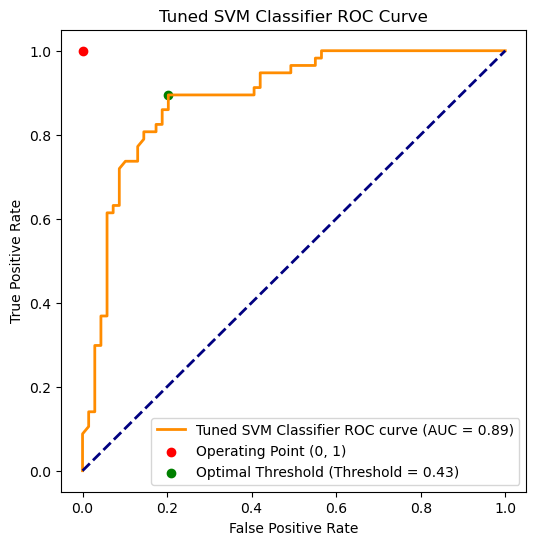

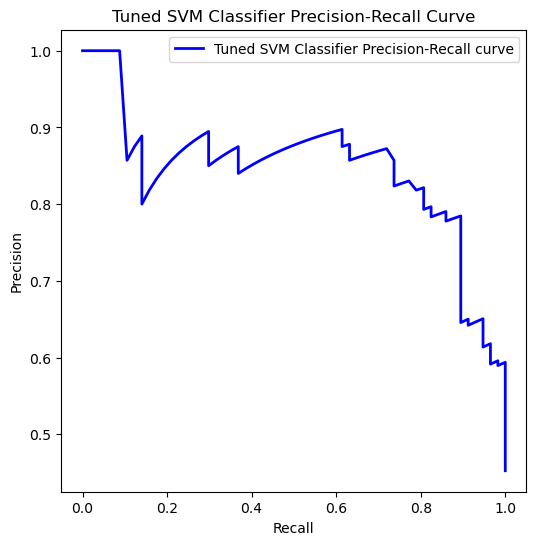

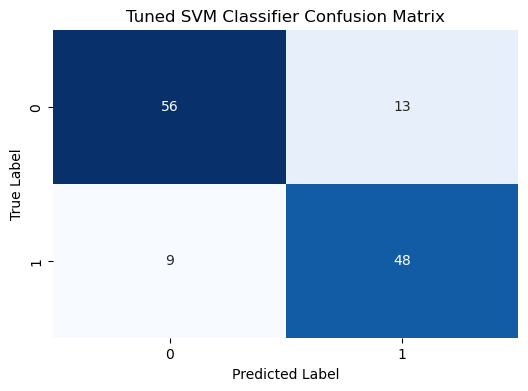

In [86]:
# Hyperparameter Grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

# SVM Classifier
svm_model = SVC(probability=True, random_state=42)

# Grid Search
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Best Hyperparameters
best_params_svm = grid_search_svm.best_params_
print(f'Best Hyperparameters for SVM: {best_params_svm}')

# Best SVM Model
best_svm_model = grid_search_svm.best_estimator_

# Model Training
best_svm_model.fit(X_train, y_train)

# Model Prediction
y_pred_svm_tuned = best_svm_model.predict(X_test)
y_prob_svm_tuned = best_svm_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
print(f'Tuned SVM Classifier Accuracy: {accuracy_svm_tuned}')

classification_rep_svm_tuned = classification_report(y_test, y_pred_svm_tuned)
print(f'Tuned SVM Classifier Classification Report:\n{classification_rep_svm_tuned}')

conf_matrix_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)
print(f'Tuned SVM Classifier Confusion Matrix:\n{conf_matrix_svm_tuned}')

# ROC AUC
roc_auc_svm_tuned = roc_auc_score(y_test, y_prob_svm_tuned)
print(f'Tuned SVM Classifier ROC AUC: {roc_auc_svm_tuned}')

# ROC Curve
fpr_svm_tuned, tpr_svm_tuned, thresholds_svm_tuned = roc_curve(y_test, y_prob_svm_tuned)
optimal_threshold_svm_tuned_index = np.argmax(tpr_svm_tuned - fpr_svm_tuned)
optimal_threshold_svm_tuned = thresholds_svm_tuned[optimal_threshold_svm_tuned_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_svm_tuned, tpr_svm_tuned, color='darkorange', lw=2, label=f'Tuned SVM Classifier ROC curve (AUC = {roc_auc_svm_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_svm_tuned[optimal_threshold_svm_tuned_index], tpr_svm_tuned[optimal_threshold_svm_tuned_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_svm_tuned:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned SVM Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_svm_tuned, recall_svm_tuned, _ = precision_recall_curve(y_test, y_prob_svm_tuned)

plt.figure(figsize=(6, 6))
plt.plot(recall_svm_tuned, precision_svm_tuned, color='blue', lw=2, label='Tuned SVM Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned SVM Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned SVM Classifier Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">8.4 | </span><span style="color:#ff6200">KNN Classifier</span></b></h2>

Best Hyperparameters for KNN: {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Tuned KNN Classifier Accuracy: 0.7698412698412699
Tuned KNN Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.78        69
           1       0.71      0.82      0.76        57

    accuracy                           0.77       126
   macro avg       0.77      0.77      0.77       126
weighted avg       0.78      0.77      0.77       126

Tuned KNN Classifier Confusion Matrix:
[[50 19]
 [10 47]]
Tuned KNN Classifier ROC AUC: 0.8573607932875668


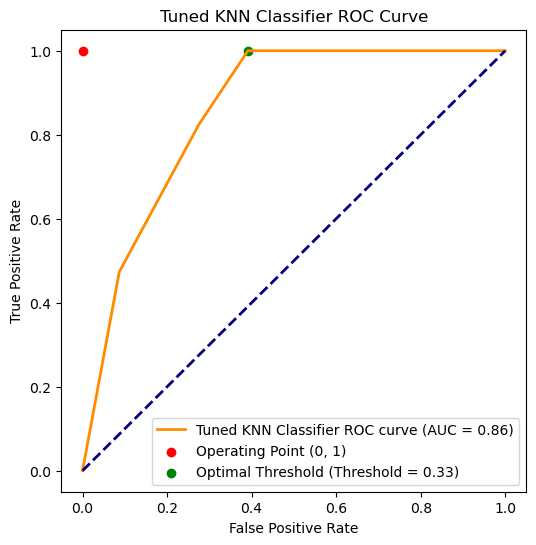

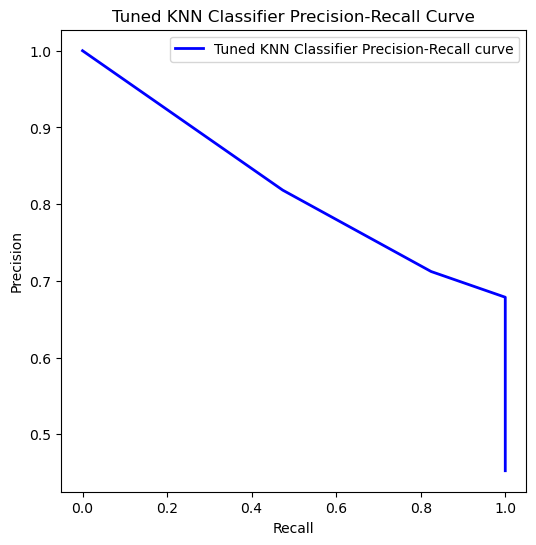

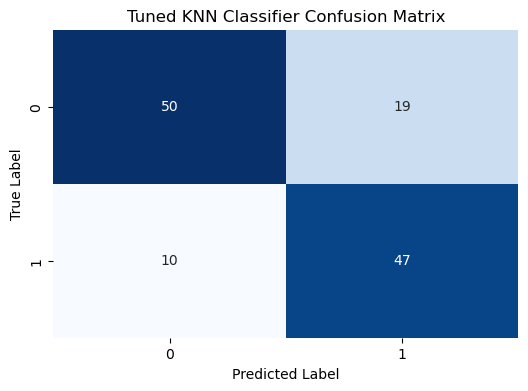

In [87]:
# Hyperparameter Grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 40]
}

# KNN Classifier
knn_model = KNeighborsClassifier()

# Grid Search
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Best Hyperparameters
best_params_knn = grid_search_knn.best_params_
print(f'Best Hyperparameters for KNN: {best_params_knn}')

# Best KNN Model
best_knn_model = grid_search_knn.best_estimator_

# Model Training
best_knn_model.fit(X_train, y_train)

# Model Prediction
y_pred_knn_tuned = best_knn_model.predict(X_test)
y_prob_knn_tuned = best_knn_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print(f'Tuned KNN Classifier Accuracy: {accuracy_knn_tuned}')

classification_rep_knn_tuned = classification_report(y_test, y_pred_knn_tuned)
print(f'Tuned KNN Classifier Classification Report:\n{classification_rep_knn_tuned}')

conf_matrix_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
print(f'Tuned KNN Classifier Confusion Matrix:\n{conf_matrix_knn_tuned}')

# ROC AUC
roc_auc_knn_tuned = roc_auc_score(y_test, y_prob_knn_tuned)
print(f'Tuned KNN Classifier ROC AUC: {roc_auc_knn_tuned}')

# ROC Curve
fpr_knn_tuned, tpr_knn_tuned, thresholds_knn_tuned = roc_curve(y_test, y_prob_knn_tuned)
optimal_threshold_knn_tuned_index = np.argmax(tpr_knn_tuned - fpr_knn_tuned)
optimal_threshold_knn_tuned = thresholds_knn_tuned[optimal_threshold_knn_tuned_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_knn_tuned, tpr_knn_tuned, color='darkorange', lw=2, label=f'Tuned KNN Classifier ROC curve (AUC = {roc_auc_knn_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_knn_tuned[optimal_threshold_knn_tuned_index], tpr_knn_tuned[optimal_threshold_knn_tuned_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_knn_tuned:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned KNN Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_knn_tuned, recall_knn_tuned, _ = precision_recall_curve(y_test, y_prob_knn_tuned)

plt.figure(figsize=(6, 6))
plt.plot(recall_knn_tuned, precision_knn_tuned, color='blue', lw=2, label='Tuned KNN Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned KNN Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned KNN Classifier Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">8.5 | </span><span style="color:#ff6200">XGBoost Classifier</span></b></h2>

Best Hyperparameters for XGBoost: {'gamma': 1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 50}
Tuned XGBoost Classifier Accuracy: 0.8333333333333334
Tuned XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        69
           1       0.82      0.81      0.81        57

    accuracy                           0.83       126
   macro avg       0.83      0.83      0.83       126
weighted avg       0.83      0.83      0.83       126

Tuned XGBoost Classifier Confusion Matrix:
[[59 10]
 [11 46]]
Tuned XGBoost Classifier ROC AUC: 0.9054157131960335


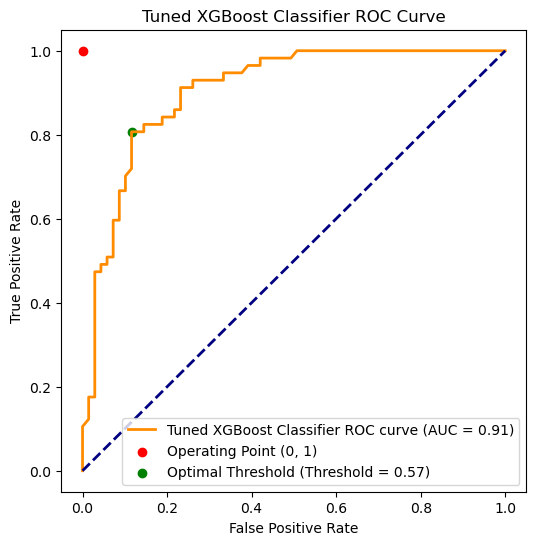

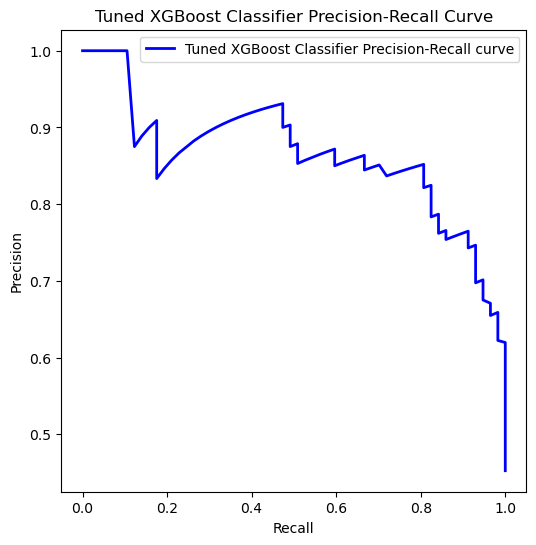

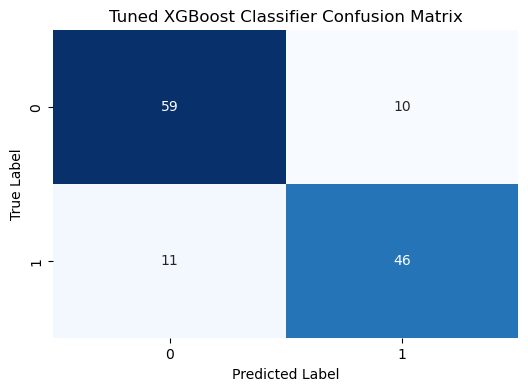

In [88]:
# Hyperparameter Grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Grid Search
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Best Hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print(f'Best Hyperparameters for XGBoost: {best_params_xgb}')

# Best XGBoost Model
best_xgb_model = grid_search_xgb.best_estimator_

# Model Training
best_xgb_model.fit(X_train, y_train)

# Model Prediction
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
y_prob_xgb_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f'Tuned XGBoost Classifier Accuracy: {accuracy_xgb_tuned}')

classification_rep_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned)
print(f'Tuned XGBoost Classifier Classification Report:\n{classification_rep_xgb_tuned}')

conf_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
print(f'Tuned XGBoost Classifier Confusion Matrix:\n{conf_matrix_xgb_tuned}')

# ROC AUC
roc_auc_xgb_tuned = roc_auc_score(y_test, y_prob_xgb_tuned)
print(f'Tuned XGBoost Classifier ROC AUC: {roc_auc_xgb_tuned}')

# ROC Curve
fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test, y_prob_xgb_tuned)
optimal_threshold_xgb_tuned_index = np.argmax(tpr_xgb_tuned - fpr_xgb_tuned)
optimal_threshold_xgb_tuned = thresholds_xgb_tuned[optimal_threshold_xgb_tuned_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color='darkorange', lw=2, label=f'Tuned XGBoost Classifier ROC curve (AUC = {roc_auc_xgb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_xgb_tuned[optimal_threshold_xgb_tuned_index], tpr_xgb_tuned[optimal_threshold_xgb_tuned_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_xgb_tuned:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned XGBoost Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_xgb_tuned, recall_xgb_tuned, _ = precision_recall_curve(y_test, y_prob_xgb_tuned)

plt.figure(figsize=(6, 6))
plt.plot(recall_xgb_tuned, precision_xgb_tuned, color='blue', lw=2, label='Tuned XGBoost Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned XGBoost Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned XGBoost Classifier Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">8.6 | </span><span style="color:#ff6200">Logistic Regression</span></b></h2>

Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.8253968253968254
Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        69
           1       0.81      0.81      0.81        57

    accuracy                           0.83       126
   macro avg       0.82      0.82      0.82       126
weighted avg       0.83      0.83      0.83       126

Tuned Logistic Regression Confusion Matrix:
[[58 11]
 [11 46]]
Tuned Logistic Regression ROC AUC: 0.8816425120772946


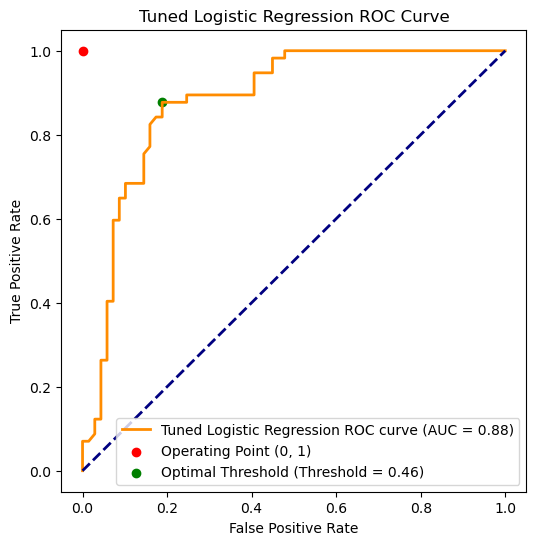

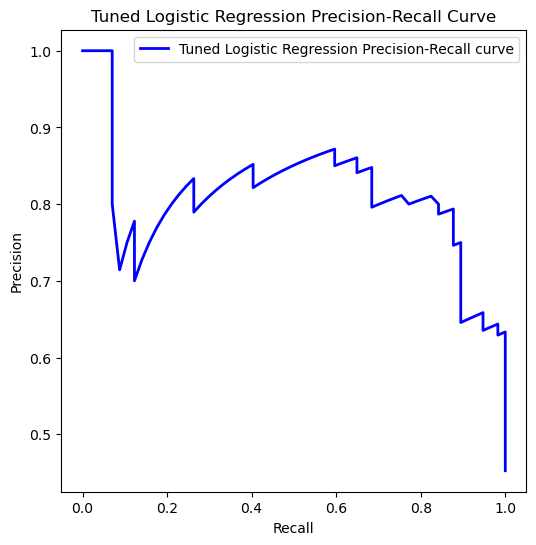

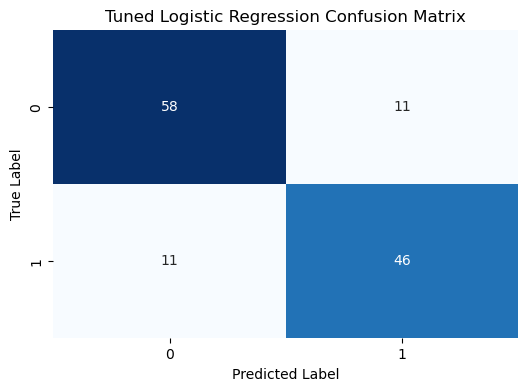

In [89]:
# Hyperparameter Grid
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# Logistic Regression Classifier
logreg_model = LogisticRegression(random_state=42)

# Grid Search
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

# Best Hyperparameters
best_params_logreg = grid_search_logreg.best_params_
print(f'Best Hyperparameters for Logistic Regression: {best_params_logreg}')

# Best Logistic Regression Model
best_logreg_model = grid_search_logreg.best_estimator_

# Model Training
best_logreg_model.fit(X_train, y_train)

# Model Prediction
y_pred_logreg_tuned = best_logreg_model.predict(X_test)
y_prob_logreg_tuned = best_logreg_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
print(f'Tuned Logistic Regression Accuracy: {accuracy_logreg_tuned}')

classification_rep_logreg_tuned = classification_report(y_test, y_pred_logreg_tuned)
print(f'Tuned Logistic Regression Classification Report:\n{classification_rep_logreg_tuned}')

conf_matrix_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned)
print(f'Tuned Logistic Regression Confusion Matrix:\n{conf_matrix_logreg_tuned}')

# ROC AU
roc_auc_logreg_tuned = roc_auc_score(y_test, y_prob_logreg_tuned)
print(f'Tuned Logistic Regression ROC AUC: {roc_auc_logreg_tuned}')

# ROC Curve
fpr_logreg_tuned, tpr_logreg_tuned, thresholds_logreg_tuned = roc_curve(y_test, y_prob_logreg_tuned)
optimal_threshold_logreg_tuned_index = np.argmax(tpr_logreg_tuned - fpr_logreg_tuned)
optimal_threshold_logreg_tuned = thresholds_logreg_tuned[optimal_threshold_logreg_tuned_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_logreg_tuned, tpr_logreg_tuned, color='darkorange', lw=2, label=f'Tuned Logistic Regression ROC curve (AUC = {roc_auc_logreg_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_logreg_tuned[optimal_threshold_logreg_tuned_index], tpr_logreg_tuned[optimal_threshold_logreg_tuned_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_logreg_tuned:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_logreg_tuned, recall_logreg_tuned, _ = precision_recall_curve(y_test, y_prob_logreg_tuned)

plt.figure(figsize=(6, 6))
plt.plot(recall_logreg_tuned, precision_logreg_tuned, color='blue', lw=2, label='Tuned Logistic Regression Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Logistic Regression Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">8.7 | </span><span style="color:#ff6200">MLP Classifer</span></b></h2>

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Hyperparameters for MLP Classifier: {'activation': 'logistic', 'learning_rate': 'constant'}


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Tuned MLP Classifier Accuracy: 0.8015873015873016
Tuned MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        69
           1       0.76      0.82      0.79        57

    accuracy                           0.80       126
   macro avg       0.80      0.80      0.80       126
weighted avg       0.80      0.80      0.80       126

Tuned MLP Classifier Confusion Matrix:
[[54 15]
 [10 47]]
Tuned MLP Classifier ROC AUC: 0.8821510297482836


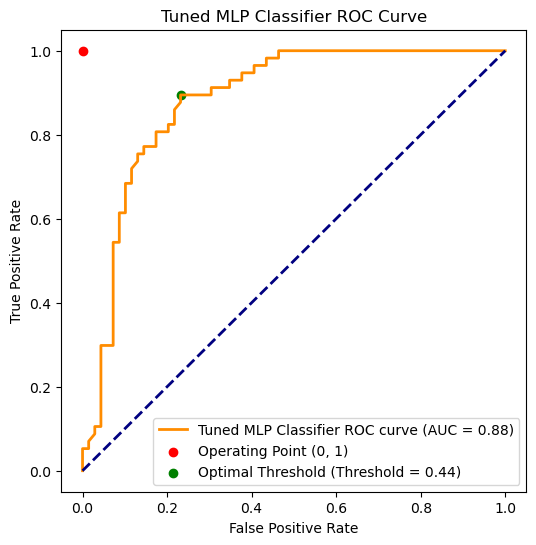

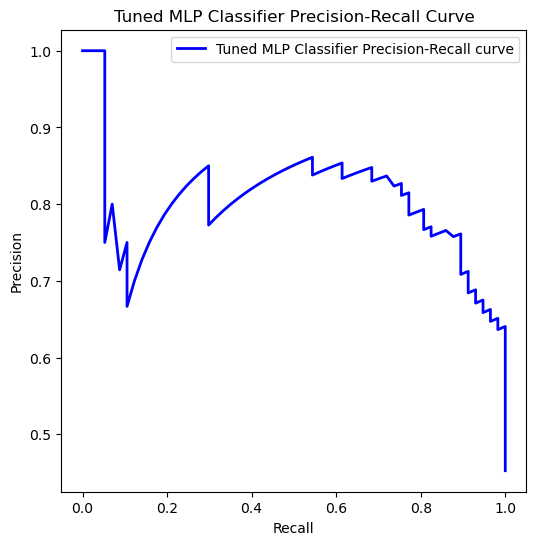

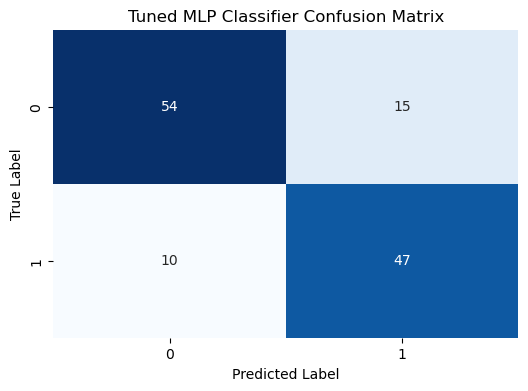

In [90]:
# Hyperparameter Grid
param_grid_mlp = {
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# MLP Classifier
mlp_model = MLPClassifier(random_state=42)

# Grid Search
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# Best Hyperparameters
best_params_mlp = grid_search_mlp.best_params_
print(f'Best Hyperparameters for MLP Classifier: {best_params_mlp}')

# Best MLP Classifier Model
best_mlp_model = grid_search_mlp.best_estimator_

# Model Training
best_mlp_model.fit(X_train, y_train)

# Model Prediction
y_pred_mlp_tuned = best_mlp_model.predict(X_test)
y_prob_mlp_tuned = best_mlp_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_mlp_tuned = accuracy_score(y_test, y_pred_mlp_tuned)
print(f'Tuned MLP Classifier Accuracy: {accuracy_mlp_tuned}')

classification_rep_mlp_tuned = classification_report(y_test, y_pred_mlp_tuned)
print(f'Tuned MLP Classifier Classification Report:\n{classification_rep_mlp_tuned}')

conf_matrix_mlp_tuned = confusion_matrix(y_test, y_pred_mlp_tuned)
print(f'Tuned MLP Classifier Confusion Matrix:\n{conf_matrix_mlp_tuned}')

# ROC AUC
roc_auc_mlp_tuned = roc_auc_score(y_test, y_prob_mlp_tuned)
print(f'Tuned MLP Classifier ROC AUC: {roc_auc_mlp_tuned}')

# ROC Curve
fpr_mlp_tuned, tpr_mlp_tuned, thresholds_mlp_tuned = roc_curve(y_test, y_prob_mlp_tuned)
optimal_threshold_mlp_tuned_index = np.argmax(tpr_mlp_tuned - fpr_mlp_tuned)
optimal_threshold_mlp_tuned = thresholds_mlp_tuned[optimal_threshold_mlp_tuned_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_mlp_tuned, tpr_mlp_tuned, color='darkorange', lw=2, label=f'Tuned MLP Classifier ROC curve (AUC = {roc_auc_mlp_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_mlp_tuned[optimal_threshold_mlp_tuned_index], tpr_mlp_tuned[optimal_threshold_mlp_tuned_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_mlp_tuned:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned MLP Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_mlp_tuned, recall_mlp_tuned, _ = precision_recall_curve(y_test, y_prob_mlp_tuned)

plt.figure(figsize=(6, 6))
plt.plot(recall_mlp_tuned, precision_mlp_tuned, color='blue', lw=2, label='Tuned MLP Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned MLP Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned MLP Classifier Confusion Matrix')
plt.show()

<a id="summary"></a>
<h2><b><span style="color:#005f26">8.8 | </span><span style="color:#ff6200">Gradient Boosting</span></b></h2>

Best Hyperparameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Gradient Boosting Classifier Accuracy: 0.873015873015873
Tuned Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        69
           1       0.82      0.93      0.87        57

    accuracy                           0.87       126
   macro avg       0.87      0.88      0.87       126
weighted avg       0.88      0.87      0.87       126

Tuned Gradient Boosting Classifier Confusion Matrix:
[[57 12]
 [ 4 53]]
Tuned Gradient Boosting Classifier ROC AUC: 0.9024917365878464


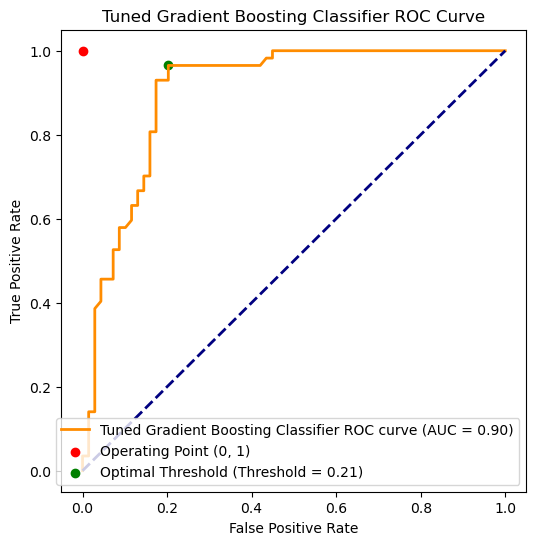

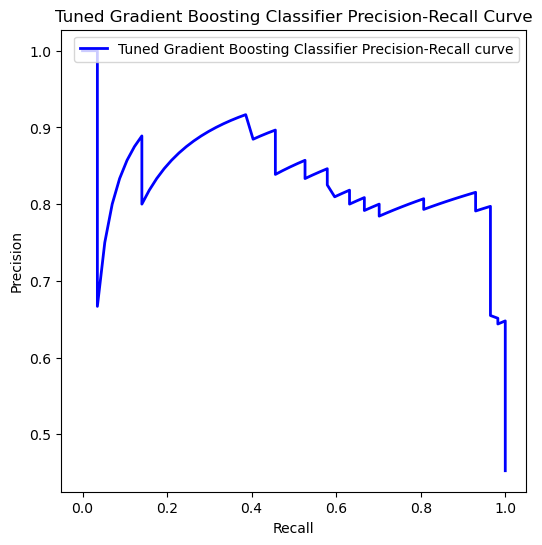

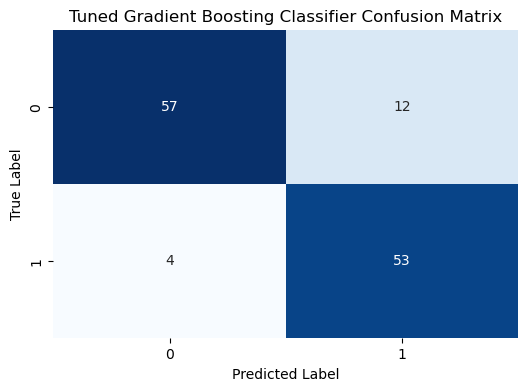

In [91]:
# Hyperparameter Grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Grid Search
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Best Hyperparameters
best_params_gb = grid_search_gb.best_params_
print(f'Best Hyperparameters for Gradient Boosting Classifier: {best_params_gb}')

# Best Gradient Boosting Classifier Model
best_gb_model = grid_search_gb.best_estimator_

# Model Training
best_gb_model.fit(X_train, y_train)

# Model Prediction
y_pred_gb_tuned = best_gb_model.predict(X_test)
y_prob_gb_tuned = best_gb_model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy_gb_tuned = accuracy_score(y_test, y_pred_gb_tuned)
print(f'Tuned Gradient Boosting Classifier Accuracy: {accuracy_gb_tuned}')

classification_rep_gb_tuned = classification_report(y_test, y_pred_gb_tuned)
print(f'Tuned Gradient Boosting Classifier Classification Report:\n{classification_rep_gb_tuned}')

conf_matrix_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)
print(f'Tuned Gradient Boosting Classifier Confusion Matrix:\n{conf_matrix_gb_tuned}')

# ROC AUC
roc_auc_gb_tuned = roc_auc_score(y_test, y_prob_gb_tuned)
print(f'Tuned Gradient Boosting Classifier ROC AUC: {roc_auc_gb_tuned}')

# ROC Curve
fpr_gb_tuned, tpr_gb_tuned, thresholds_gb_tuned = roc_curve(y_test, y_prob_gb_tuned)
optimal_threshold_gb_tuned_index = np.argmax(tpr_gb_tuned - fpr_gb_tuned)
optimal_threshold_gb_tuned = thresholds_gb_tuned[optimal_threshold_gb_tuned_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_gb_tuned, tpr_gb_tuned, color='darkorange', lw=2, label=f'Tuned Gradient Boosting Classifier ROC curve (AUC = {roc_auc_gb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_gb_tuned[optimal_threshold_gb_tuned_index], tpr_gb_tuned[optimal_threshold_gb_tuned_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_gb_tuned:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Gradient Boosting Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_gb_tuned, recall_gb_tuned, _ = precision_recall_curve(y_test, y_prob_gb_tuned)

plt.figure(figsize=(6, 6))
plt.plot(recall_gb_tuned, precision_gb_tuned, color='blue', lw=2, label='Tuned Gradient Boosting Classifier Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Gradient Boosting Classifier Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned Gradient Boosting Classifier Confusion Matrix')
plt.show()

<a id="preprocessing"></a>
<h2><b><span style="color:#005f26">🔶 Step 9 | </span><span style="color:#ff6200">Final Model</span></b></h2>

<h2><b><span style="color:#ff6200">Random Forest</span></b></h2>

Alasan pemilihan model Random Forest untuk Diabetes:
1) Kemampuan Menangani Fitur yang Banyak:
Model Random Forest mampu menangani dataset dengan fitur yang banyak tanpa memerlukan pre-processing yang intensif. Ini cocok untuk dataset seperti data diabetes atau medis yang memiliki banyak fitur.
2) Kemampuan Menangani Kekurangan Data:
Random Forest dapat mengatasi kekurangan data dengan mengisi nilai yang hilang atau tidak lengkap. Hal ini bermanfaat dalam kasus data diabetes atau medis dimana seringkali terdapat kekurangan informasi.
3) Pemilihan Fitur Otomatis:
Model Random Forest memberikan informasi tentang pentingnya setiap fitur dalam membuat prediksi. Ini dapat membantu dalam pemilihan fitur otomatis, memfokuskan perhatian pada fitur-fitur yang paling berpengaruh.
4) Kemampuan Mengatasi Masalah Ketidakseimbangan Kelas:
Dalam kasus ini dimana kelas positif (kasus diabetes) lebih sedikit daripada kelas negatif, Random Forest dapat menangani masalah ketidakseimbangan kelas dengan lebih baik dibandingkan dengan beberapa model lainnya.
5) Kemampuan Menghasilkan Probabilitas:
Random Forest dapat menghasilkan probabilitas untuk setiap kelas, bukan hanya label prediksi. Ini bermanfaat untuk mendapatkan pemahaman lebih dalam tentang keyakinan model terhadap prediksi tertentu.

,Random Forest (Before Tuning),Tuned Random Forest
Accuracy,0.865079,0.873016
ROC AUC,0.906560,0.923341
Precision,0.744837,0.737025
Recall,0.704330,0.732706
F1,0.647744,0.656004
F2,0.670632,0.689046
K Fold Mean Accuracy,0.809410,0.805961
Std Deviation,0.029983,0.030791


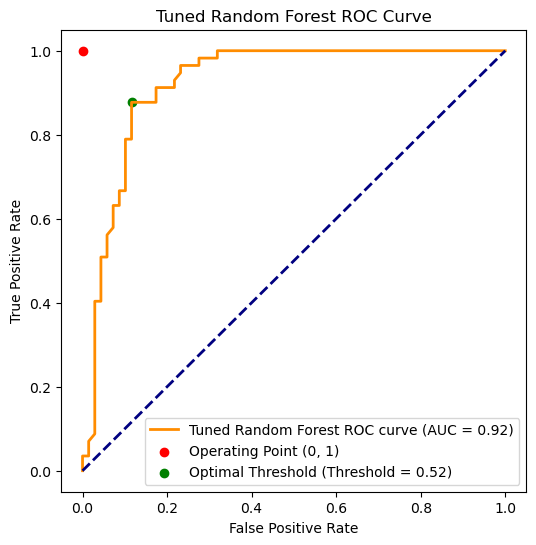

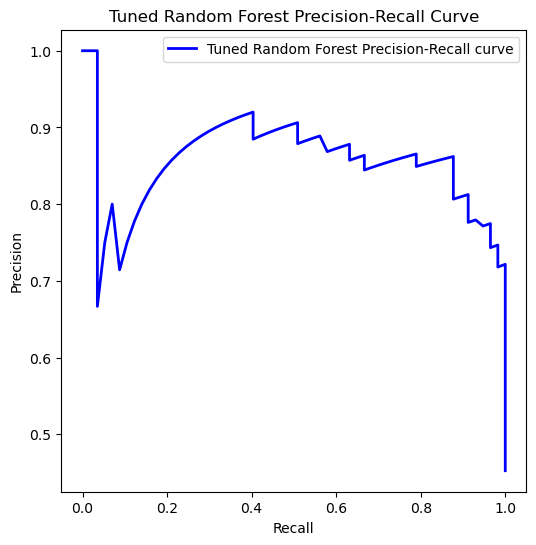

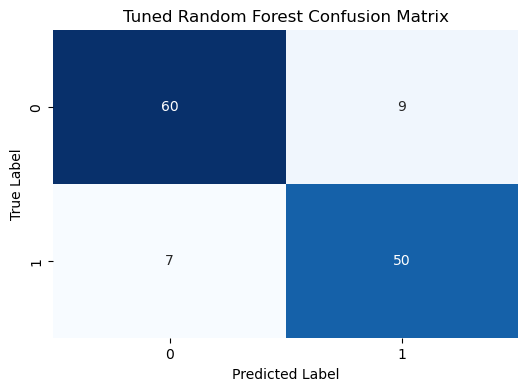

In [92]:
# Model Random Forest sebelum tuning
rf_model_before_tuning = RandomForestClassifier(random_state=42)
rf_model_before_tuning.fit(X_train, y_train)
y_prob_rf_before_tuning = rf_model_before_tuning.predict_proba(X_test)[:, 1]

# Model Random Forest setelah tuning
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_prob_rf_tuned = best_rf_model.predict_proba(X_test)[:, 1]

# Hitung metrik untuk model sebelum tuning
accuracy_rf_before_tuning = accuracy_score(y_test, rf_model_before_tuning.predict(X_test))
roc_auc_rf_before_tuning = roc_auc_score(y_test, y_prob_rf_before_tuning)
conf_matrix_rf_before_tuning = confusion_matrix(y_test, rf_model_before_tuning.predict(X_test))
precision_rf_before_tuning, recall_rf_before_tuning, _ = precision_recall_curve(y_test, y_prob_rf_before_tuning)
f1_rf_before_tuning = 2 * (precision_rf_before_tuning * recall_rf_before_tuning) / (precision_rf_before_tuning + recall_rf_before_tuning)
f2_rf_before_tuning = 5 * (precision_rf_before_tuning * recall_rf_before_tuning) / (4 * precision_rf_before_tuning + recall_rf_before_tuning)

# Hitung metrik untuk model setelah tuning
accuracy_rf_tuned = accuracy_score(y_test, best_rf_model.predict(X_test))
roc_auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)
conf_matrix_rf_tuned = confusion_matrix(y_test, best_rf_model.predict(X_test))
precision_rf_tuned, recall_rf_tuned, _ = precision_recall_curve(y_test, y_prob_rf_tuned)
f1_rf_tuned = 2 * (precision_rf_tuned * recall_rf_tuned) / (precision_rf_tuned + recall_rf_tuned)
f2_rf_tuned = 5 * (precision_rf_tuned * recall_rf_tuned) / (4 * precision_rf_tuned + recall_rf_tuned)

# Hitung K Fold Mean Accuracy dan Std Deviation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k_fold_accuracies_before_tuning = cross_val_score(rf_model_before_tuning, X_train, y_train, cv=k_fold, scoring='accuracy')
k_fold_accuracies_tuned = cross_val_score(best_rf_model, X_train, y_train, cv=k_fold, scoring='accuracy')

# Menyimpan hasil metrik dalam DataFrame
metrics_data = {
    'Metric': ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1', 'F2'],
    'Random Forest (Before Tuning)': [accuracy_rf_before_tuning, roc_auc_rf_before_tuning, np.mean(precision_rf_before_tuning), np.mean(recall_rf_before_tuning), np.mean(f1_rf_before_tuning), np.mean(f2_rf_before_tuning)],
    'Tuned Random Forest': [accuracy_rf_tuned, roc_auc_rf_tuned, np.mean(precision_rf_tuned), np.mean(recall_rf_tuned), np.mean(f1_rf_tuned), np.mean(f2_rf_tuned)]
}

metrics_data = {
    'Random Forest (Before Tuning)': [accuracy_rf_before_tuning, roc_auc_rf_before_tuning, np.mean(precision_rf_before_tuning), np.mean(recall_rf_before_tuning), np.mean(f1_rf_before_tuning), np.mean(f2_rf_before_tuning), np.mean(k_fold_accuracies_before_tuning), np.std(k_fold_accuracies_before_tuning)],
    'Tuned Random Forest': [accuracy_rf_tuned, roc_auc_rf_tuned, np.mean(precision_rf_tuned), np.mean(recall_rf_tuned), np.mean(f1_rf_tuned), np.mean(f2_rf_tuned), np.mean(k_fold_accuracies_tuned), np.std(k_fold_accuracies_tuned)]
}

metrics_df = pd.DataFrame(metrics_data, index=['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1', 'F2', 'K Fold Mean Accuracy', 'Std Deviation'])

# Menampilkan DataFrame
display(metrics_df)

# ROC Curve
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test, y_prob_rf_tuned)
optimal_threshold_rf_tuned_index = np.argmax(tpr_rf_tuned - fpr_rf_tuned)
optimal_threshold_rf_tuned = thresholds_rf_tuned[optimal_threshold_rf_tuned_index]

plt.figure(figsize=(6, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='darkorange', lw=2, label=f'Tuned Random Forest ROC curve (AUC = {roc_auc_rf_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter([0], [1], c='red', marker='o', label='Operating Point (0, 1)')
plt.scatter(fpr_rf_tuned[optimal_threshold_rf_tuned_index], tpr_rf_tuned[optimal_threshold_rf_tuned_index], c='green', marker='o', label=f'Optimal Threshold (Threshold = {optimal_threshold_rf_tuned:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_rf_tuned, recall_rf_tuned, _ = precision_recall_curve(y_test, y_prob_rf_tuned)

plt.figure(figsize=(6, 6))
plt.plot(recall_rf_tuned, precision_rf_tuned, color='blue', lw=2, label='Tuned Random Forest Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Tuned Random Forest Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Confusion Matrix Display
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()

Penjelasan Metrik:
1) Accuracy (Tingkat Ketepatan):
Sebelum diatur ulang, Random Forest berhasil memprediksi dengan benar sekitar 86.51% kasus, dan setelah diperbarui, tingkat ketepatan meningkat menjadi 87.30%. Ini berarti pembaruan model membuatnya lebih baik dalam menebak dengan benar.
2) ROC AUC:
Sebelum diatur ulang adalah 90.66%, dan setelah diperbarui meningkat menjadi 92.33%. Nilai yang lebih tinggi menunjukkan bahwa model yang diperbarui lebih baik dalam membedakan antara kategori positif dan negatif.
3) Presisi (Ketepatan):
Sebelum diatur ulang, model Random Forest berhasil memberikan prediksi positif yang benar sekitar 74.48%, dan setelah diperbarui, tingkat ketepatan menjadi 73.70%. Meskipun sedikit turun, ini menunjukkan bahwa model masih cenderung menebak positif dengan benar.
4) Recall (Kemampuan Mengenali):
Recall sebelum diatur ulang adalah 70.43%, dan setelah diperbarui meningkat menjadi 73.27%. Peningkatan ini menunjukkan bahwa setelah diperbarui, model lebih baik dalam menemukan kasus positif yang sebenarnya.
5) F1 Score:
Sebelum diatur ulang, F1 Score adalah 64.77%, dan setelah diperbarui meningkat menjadi 65.60%. Ini menandakan bahwa F1 Score meningkat setelah pembaruan, menunjukkan keseimbangan yang lebih baik antara ketepatan dan kemampuan mengenali.
6) F2 Score:
F2 Score sebelum diatur ulang adalah 67.06%, dan setelah diperbarui meningkat menjadi 68.90%. Peningkatan ini menunjukkan bahwa setelah diperbarui, model lebih fokus pada menemukan kasus positif yang sebenarnya.
7) K-Fold Mean Accuracy:
Rata-rata akurasi dari K-Fold Cross Validation sebelum diatur ulang adalah 80.94%, dan setelah diperbarui menjadi 80.60%. Meskipun sedikit menurun, model tetap memiliki tingkat konsistensi yang baik di berbagai subdataset.
8) Std Deviation:
Deviasi standar sebelum diatur ulang adalah 2.99%, dan setelah diperbarui meningkat sedikit menjadi 3.08%. Meskipun ada peningkatan, deviasi standar yang rendah menunjukkan bahwa model stabil terhadap variasi dataset.

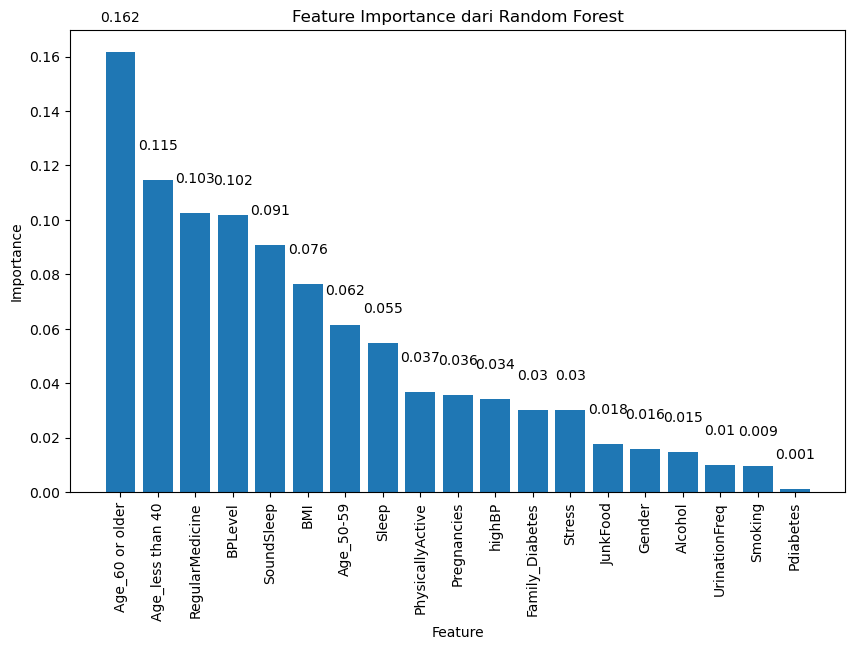

In [93]:
# Ambil feature importance dari model Random Forest
feature_importance = best_rf_model.feature_importances_

# Urutkan indeks berdasarkan nilai feature importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Ambil nama fitur dari dataset
feature_names = X.columns

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance dari Random Forest")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.show()